# Example 4: Tracking of one of two kinds of multiple particles with DeepTrack 1.0

Example code to use DeepTrack to track one of two kinds of multiple particles.
See also Figure 4c.

<strong>DeepTrack 1.0</strong><br/>
Digital Video Microscopy enhanced with Deep Learning<br/>
version 1.0 - 30 November 2018<br/>
© Saga Helgadottir, Aykut Argun & Giovanni Volpe<br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INITIALIZATION

In [1]:
import deeptrackELLIPTICALENHANCE as deeptrack

## 2. PLAY VIDEO TO BE TRACKED

The video to be tracked is played. 

Video file: DeepTrack - Example 4 - Brownian particles + bacteria.mp4

Note that the video file must be in the same folder as this notebook.

In [2]:
%%HTML

<video width="400" height="400" controls>
<source src="DeepTrack - Example 4 - Brownian particles + bacteria.mp4" type="video/mp4">
</video>

## 3. CHECK IMAGE GENERATION ROUTINE

Here, we simulate images of multiple particles similar to those we want to track. In this case, we simulate images with six particles, with four representing Brownian particles and two representing bacteria. One of the Brownian particles is positioned within 12.5 pixels from the center, and the others within 27.5 pixels from the center. An additional requirement is that the first Brownian particle is always closest the center. All the particles have a radius between 2 and 3 pixels. The Brownian particles are represented by a Bessel function of second order with a negative intensity (a dark ring) and the bacteria are represented by a Bessel funciton of first order with a positive intensity (a bright spot). The image background, SNR and illumination gradient are randomly selected from a range of values simulating the video conditions. This results in dark rings and bright spots on a dark or bright background with low SNR and gradient intensity. This image generator was used to train the pretraiend network saved in the file "DeepTrack - Example 4 - Pretrained network.h5".

Comments:
1. The <strong>image_parameters_function</strong> is a lambda function that determines the kind of particle images for which the deep learning network will be trained. Tuning its parameters is the simplest way to improve the tracking performance.<br/>
2. The <strong>image_generator</strong> is a lambda function that works as image genrator. It does not need to be changed in most cases.<br/>
3. The parameter <strong>number_of_images_to_show</strong> determines the number of sample images that are shown.
4. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.

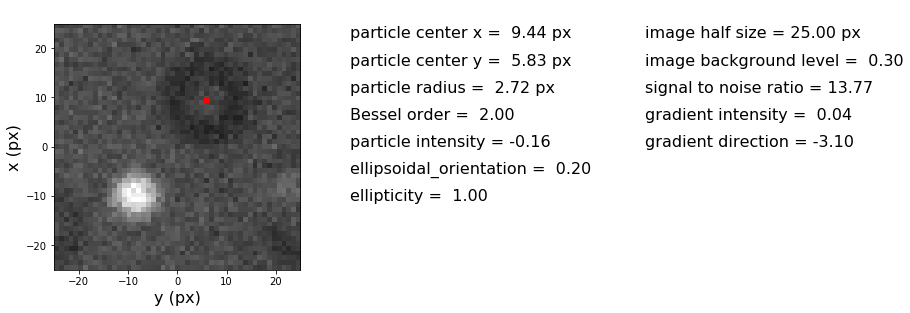

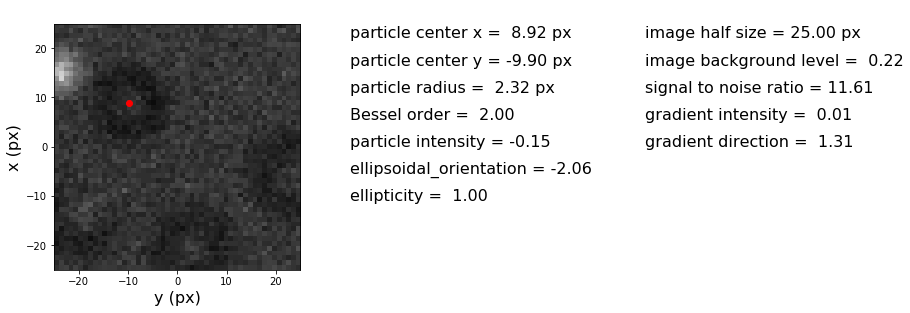

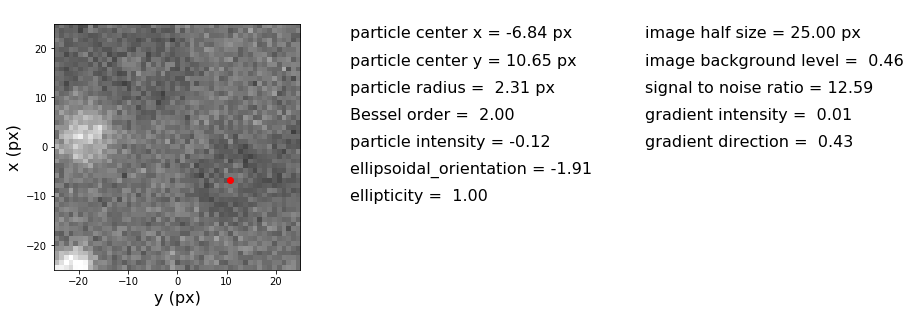

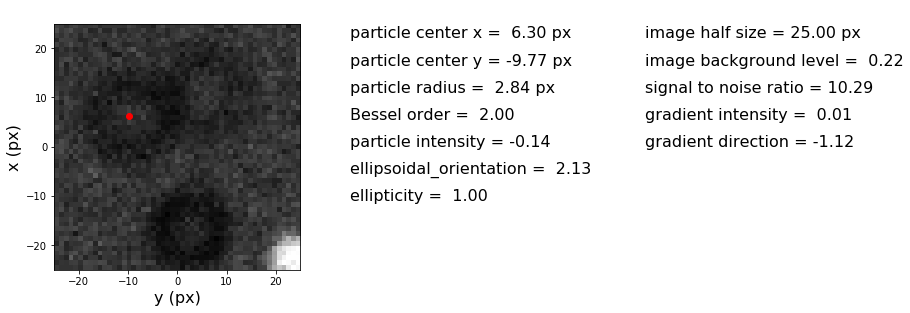

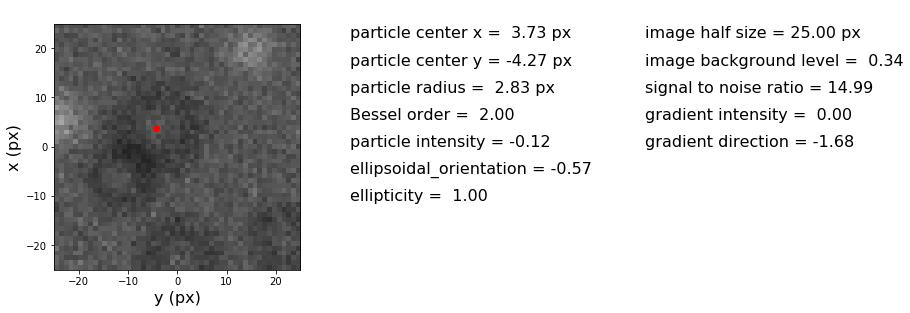

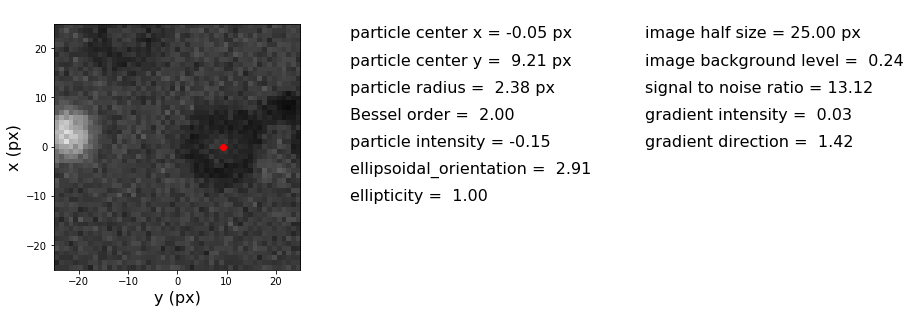

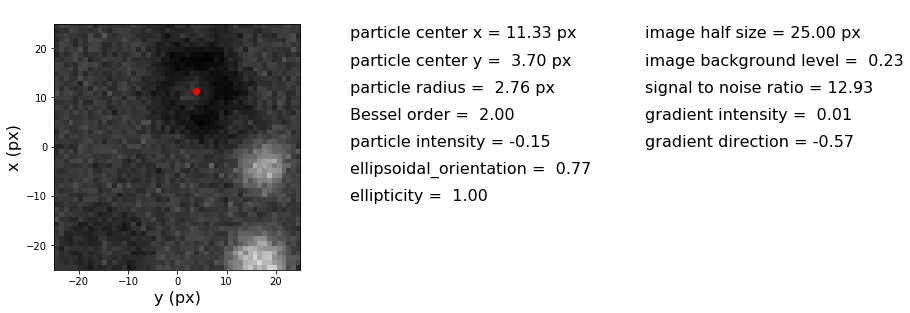

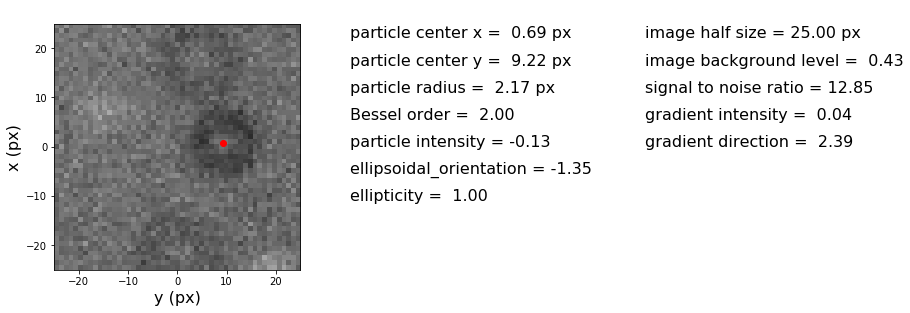

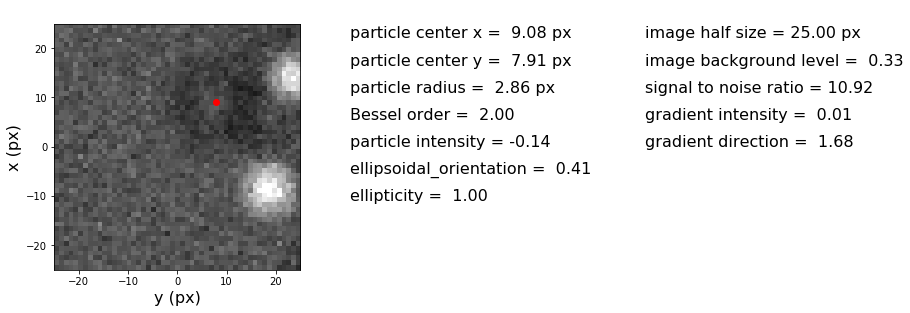

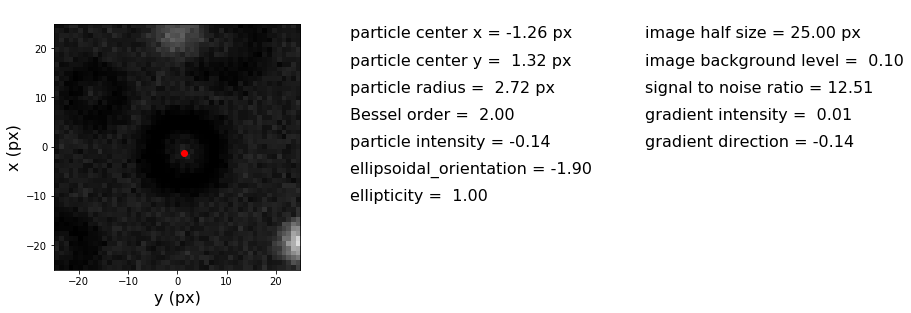

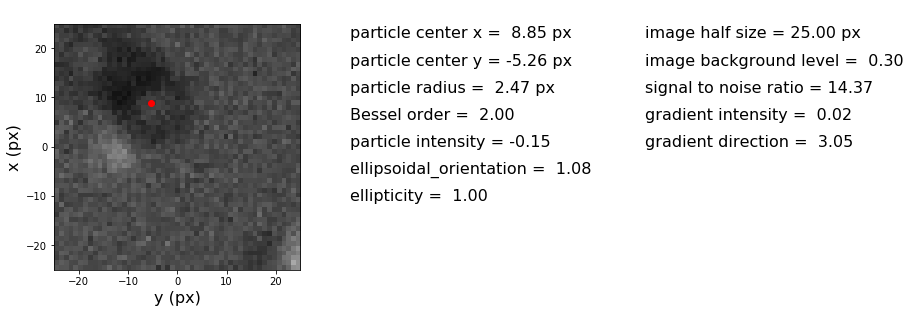

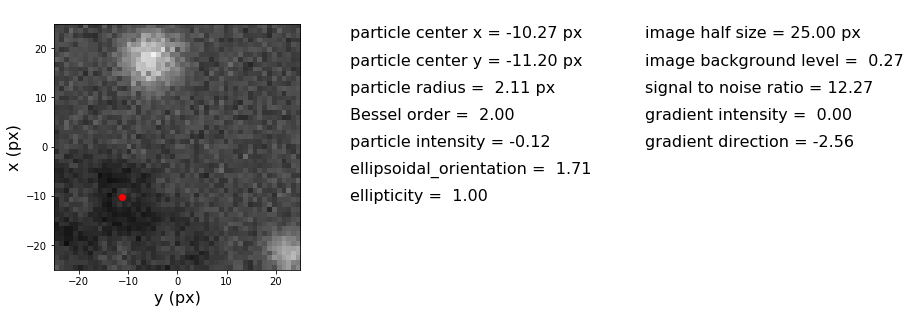

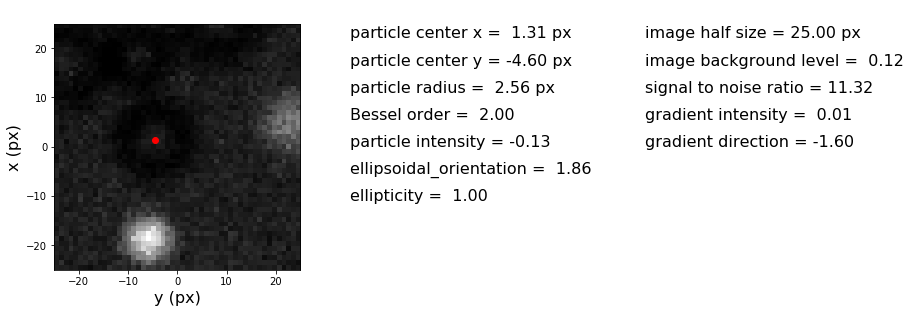

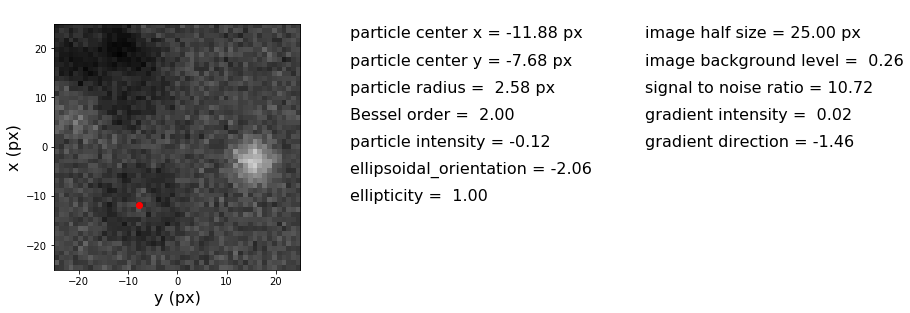

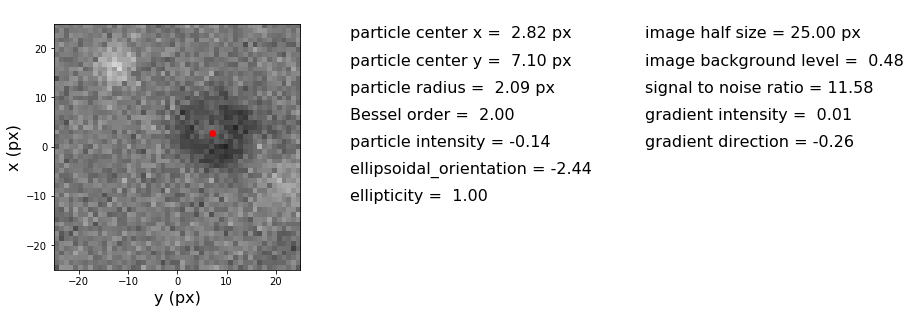

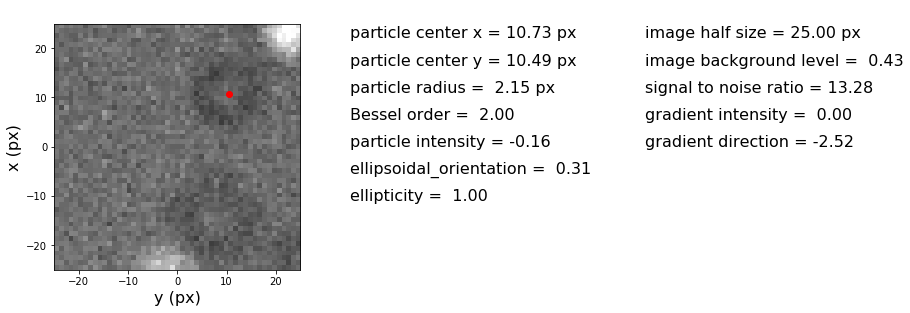

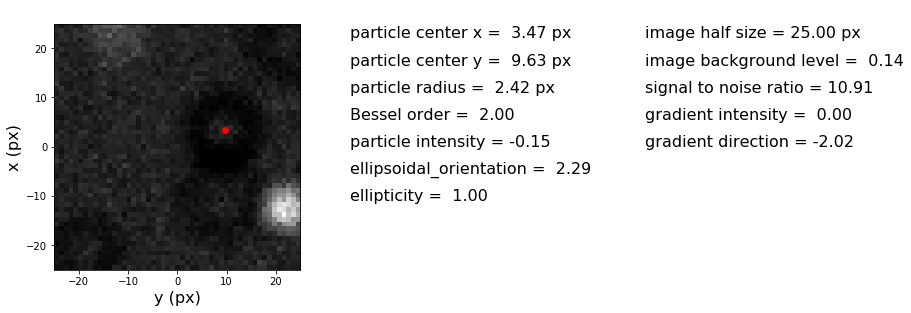

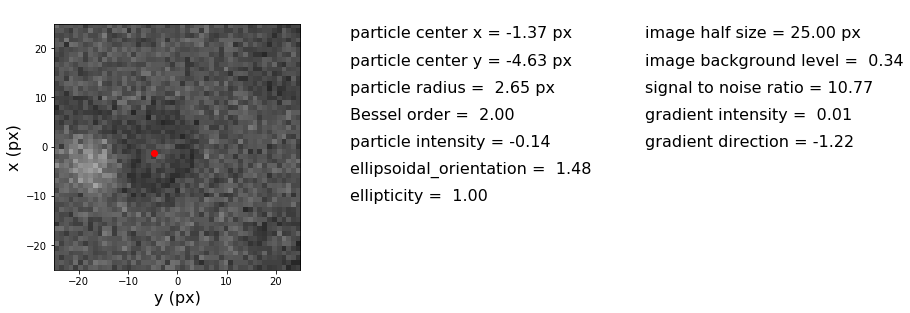

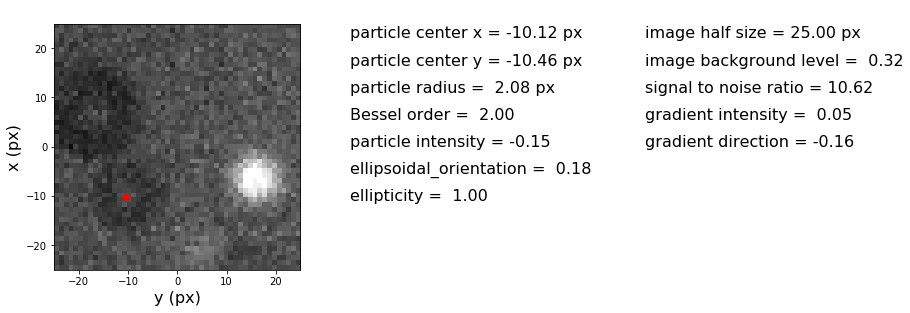

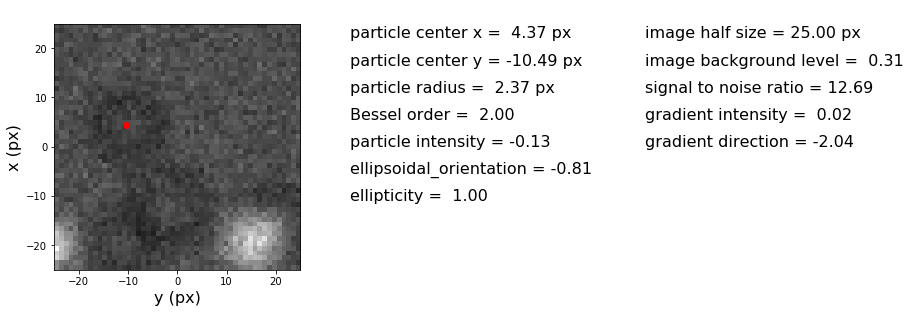

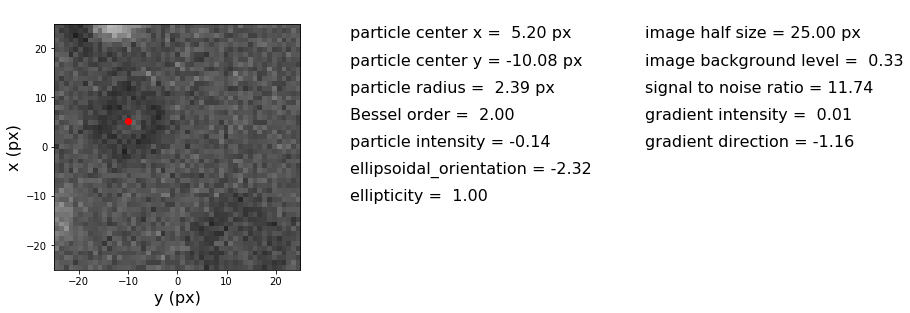

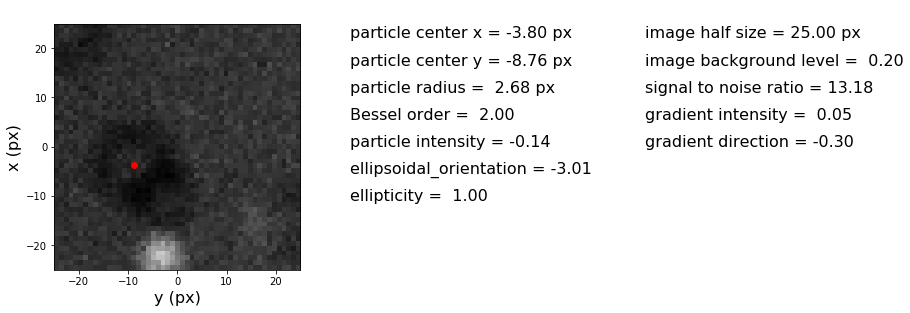

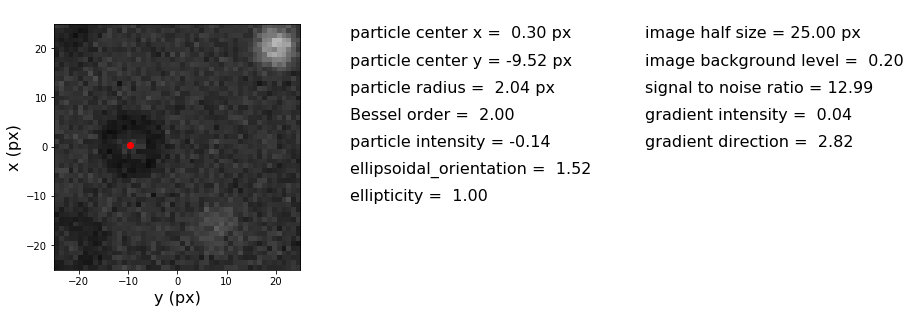

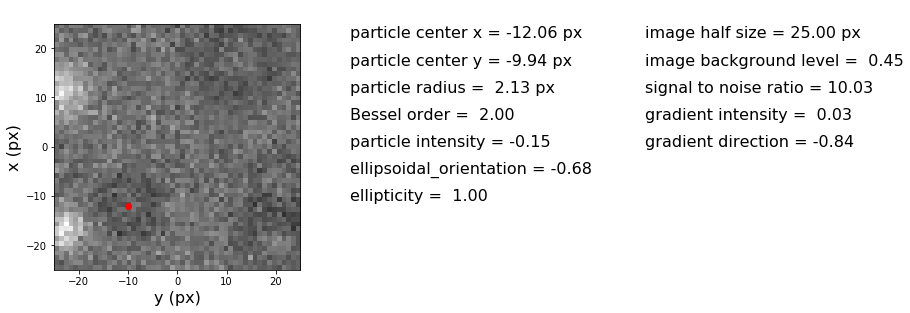

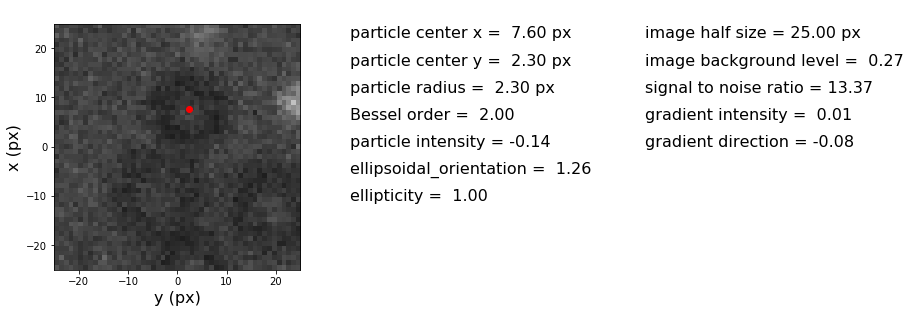

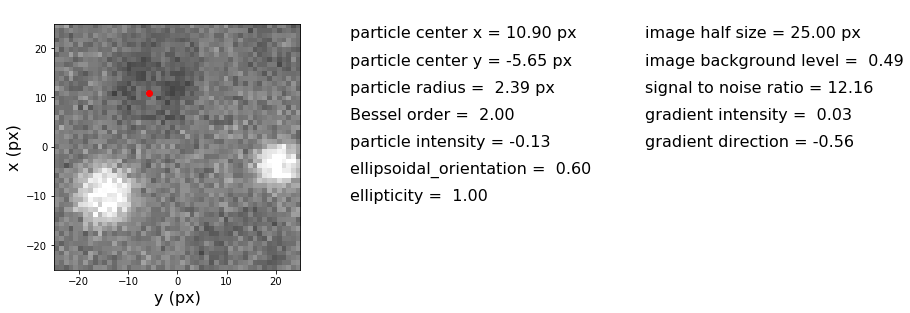

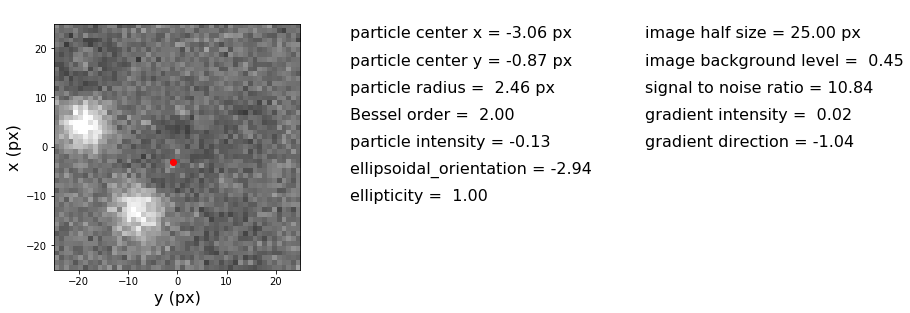

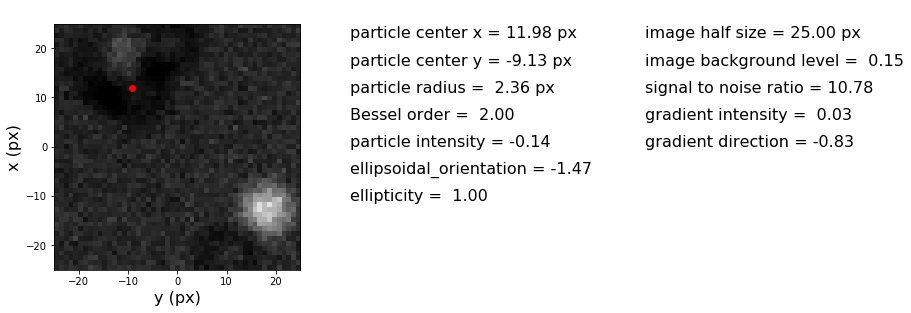

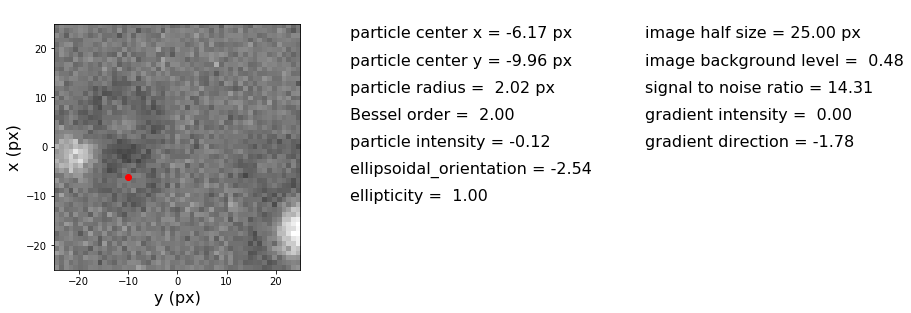

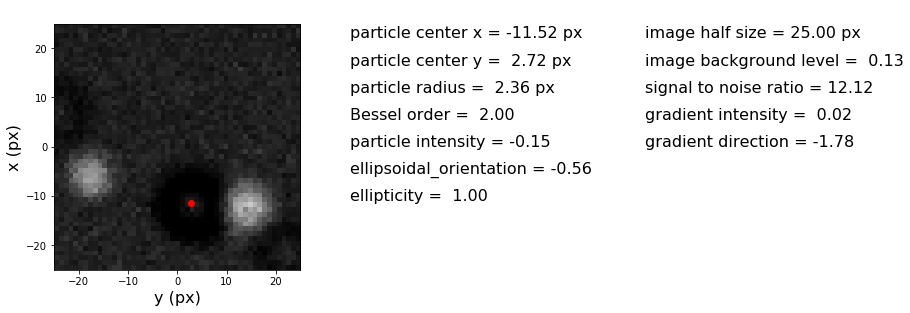

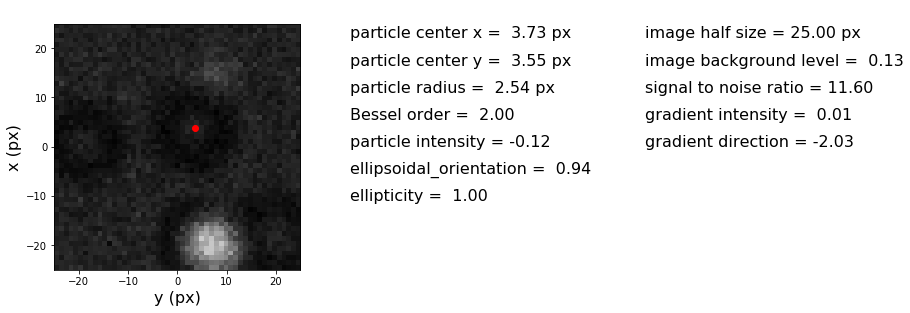

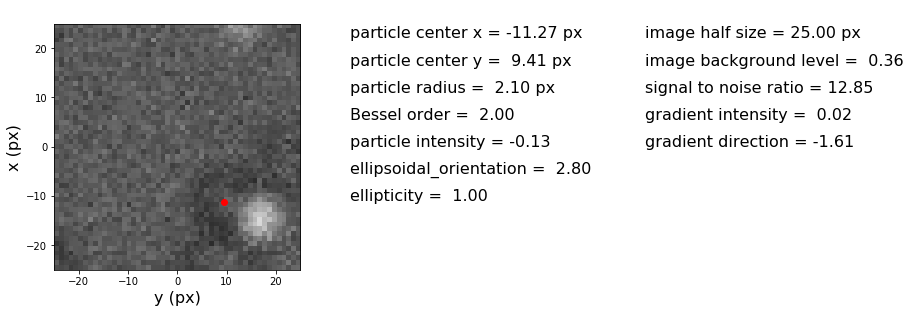

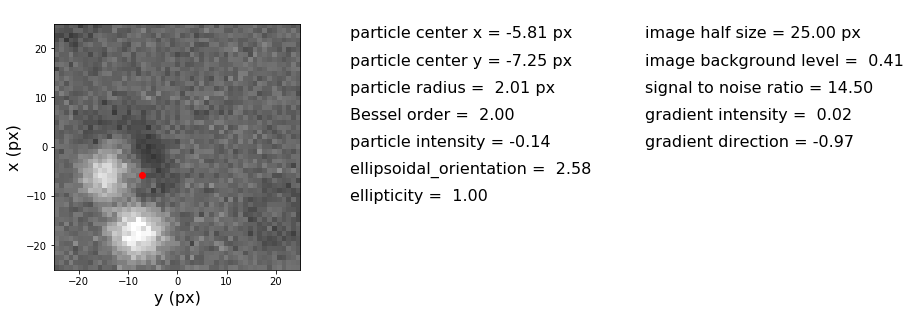

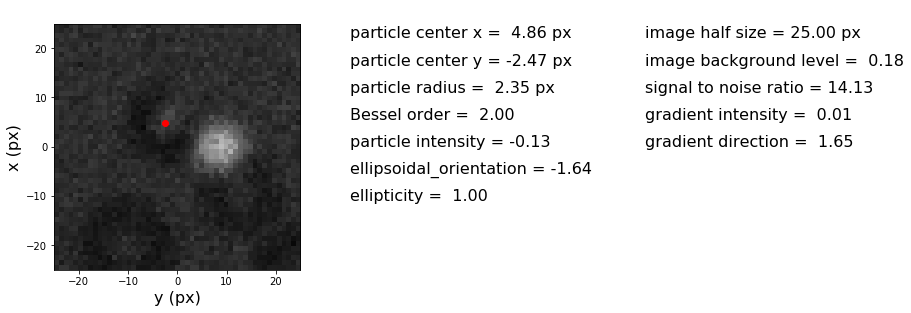

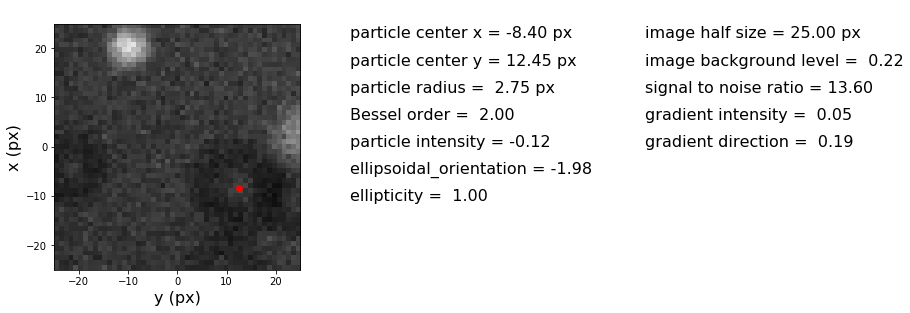

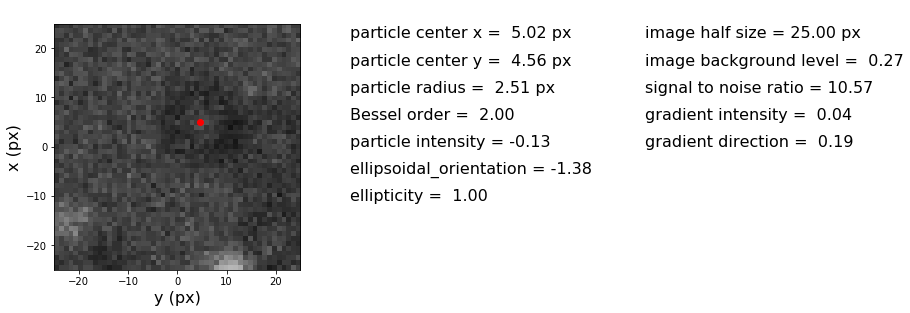

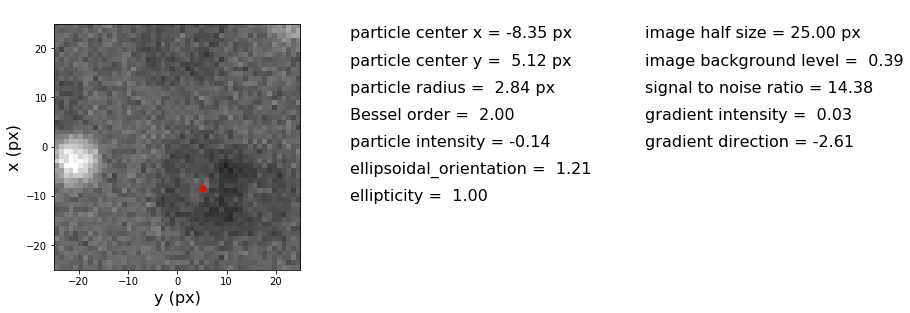

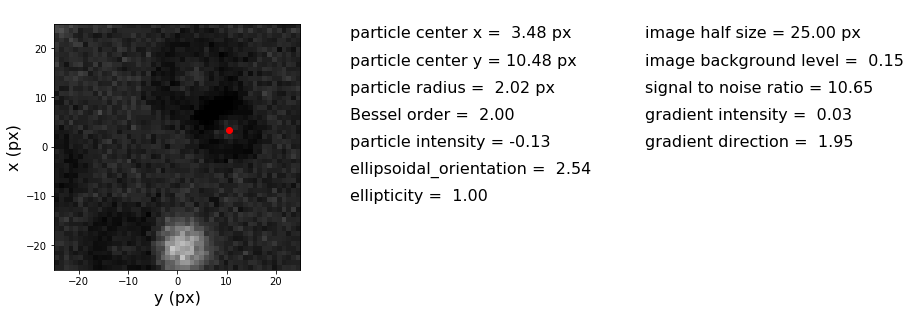

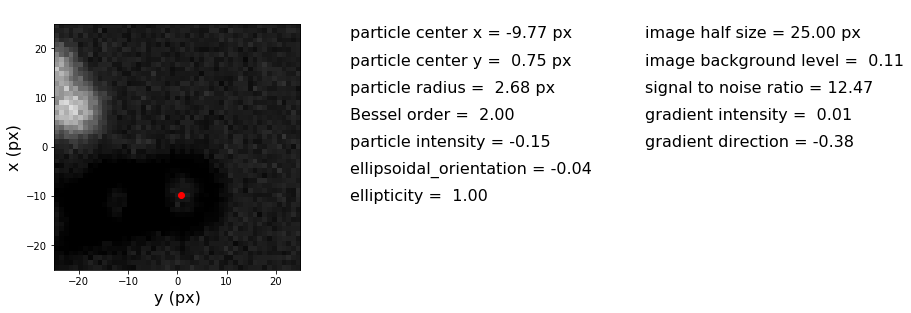

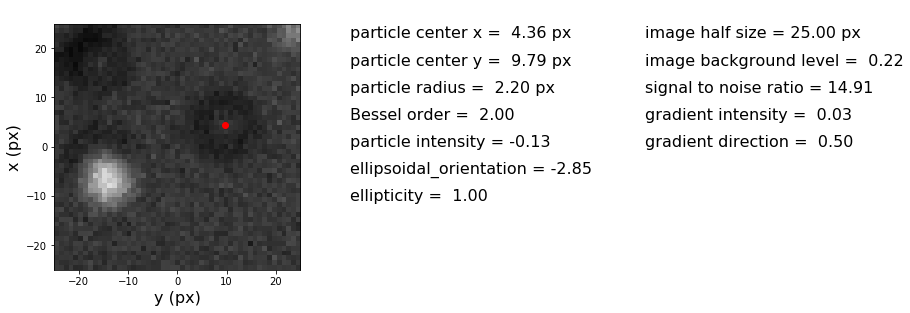

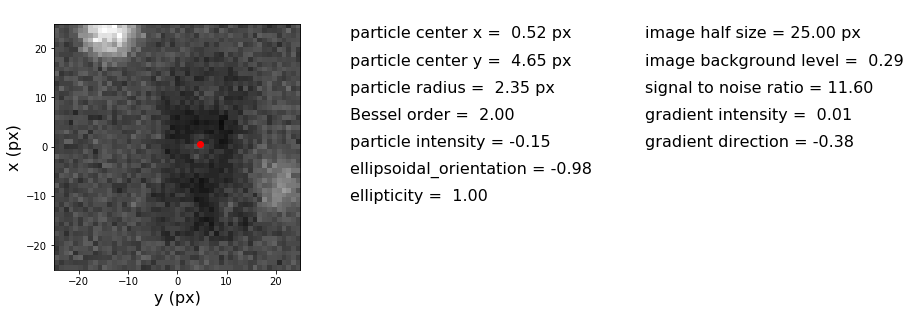

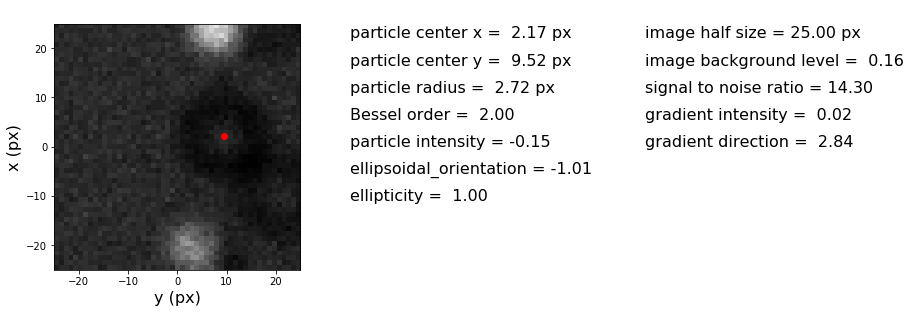

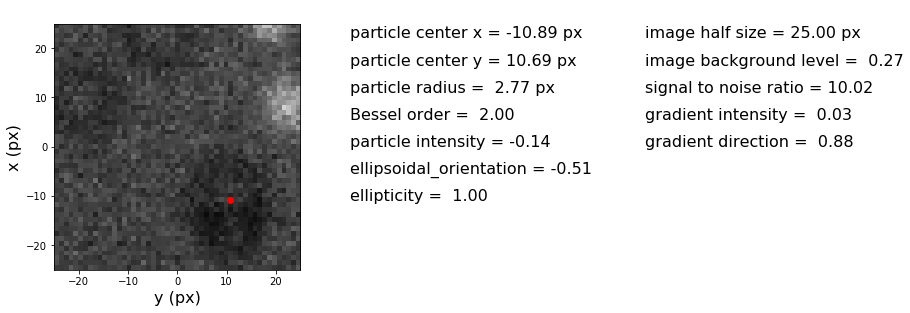

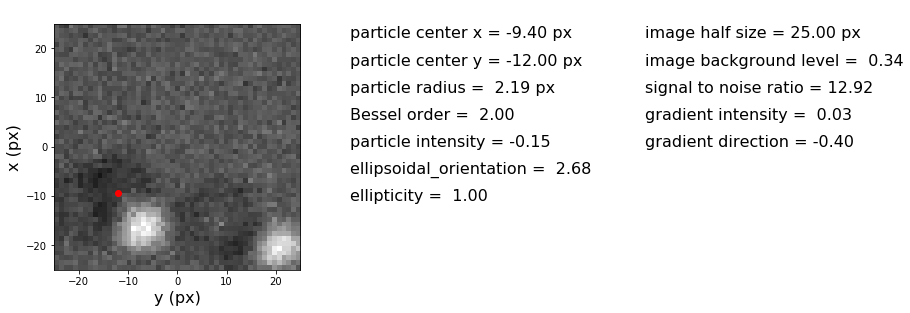

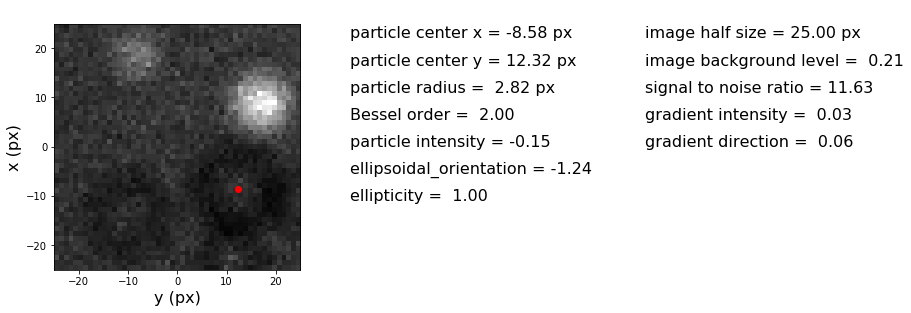

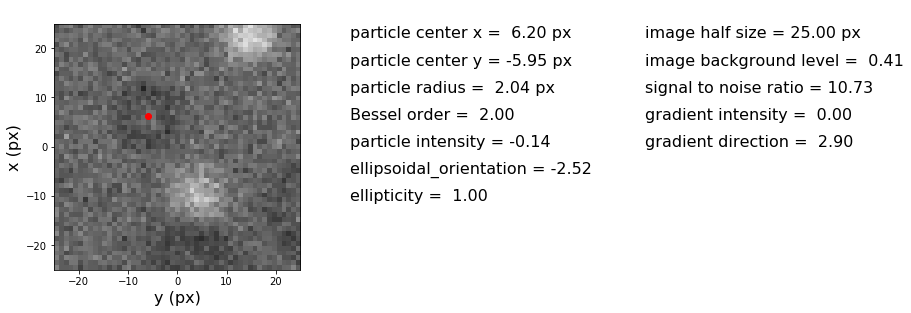

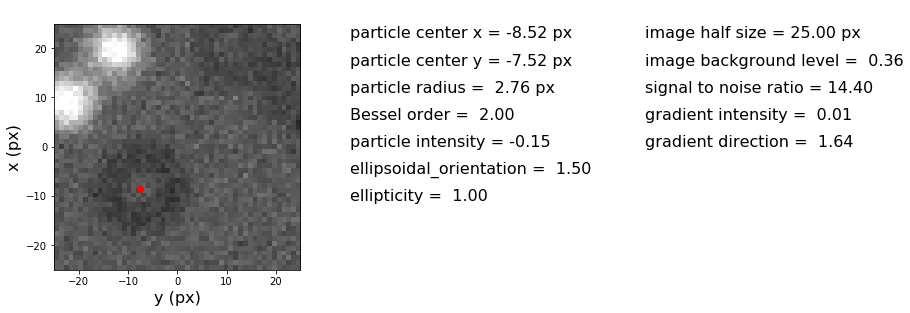

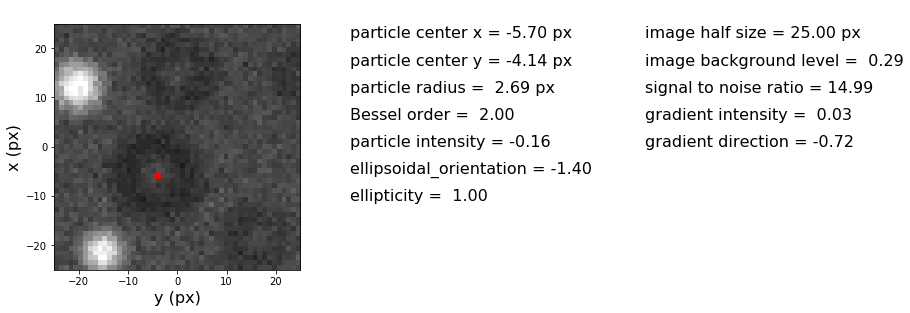

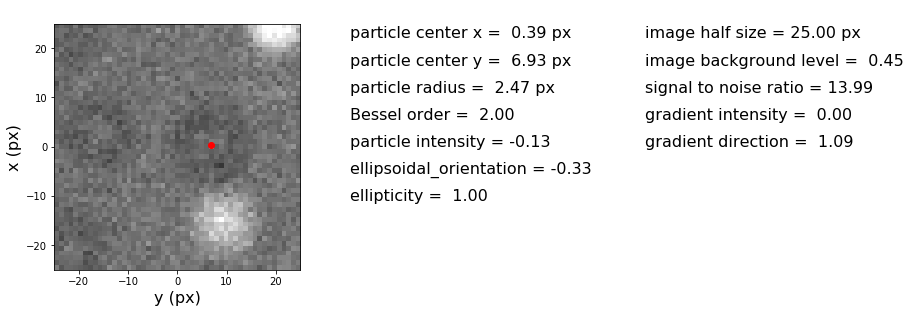

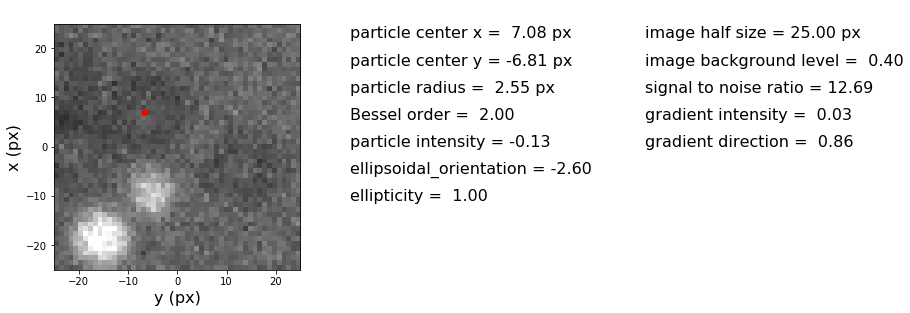

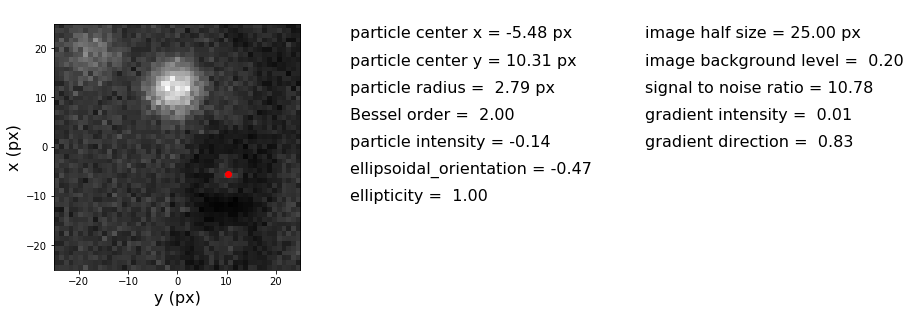

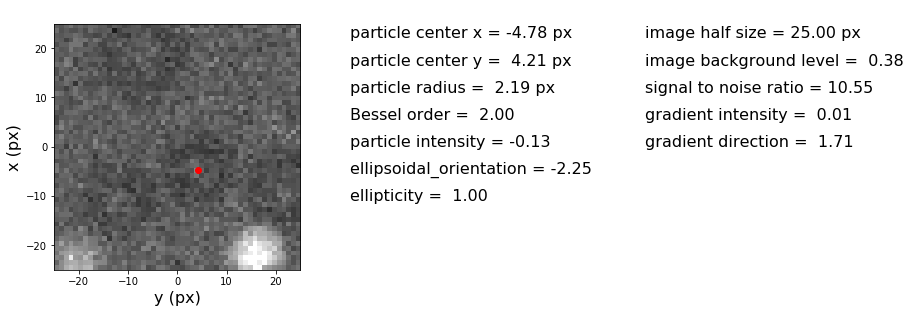

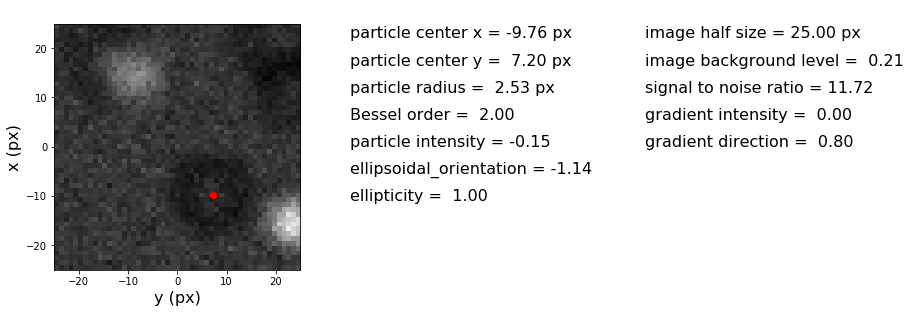

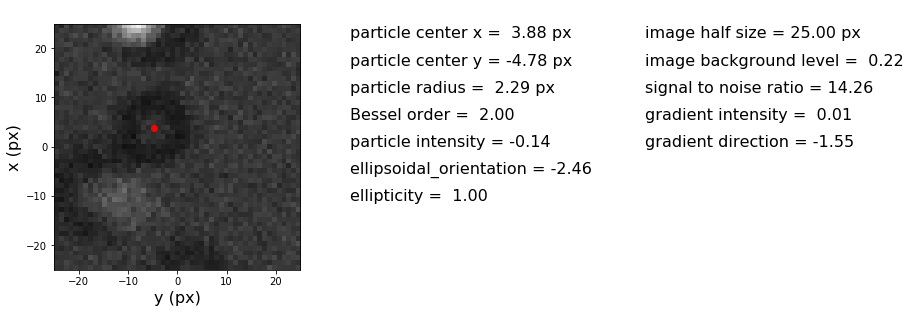

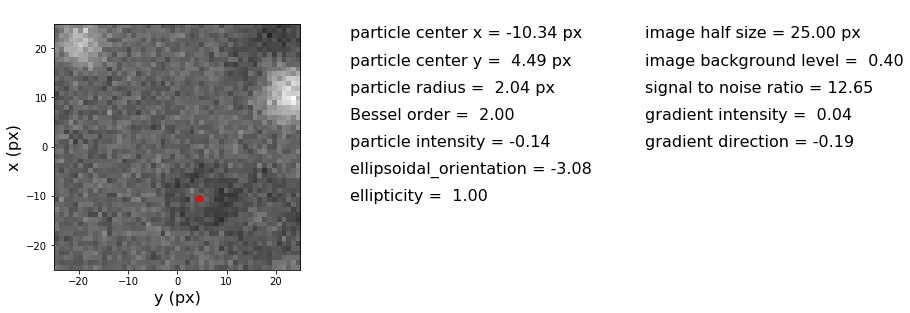

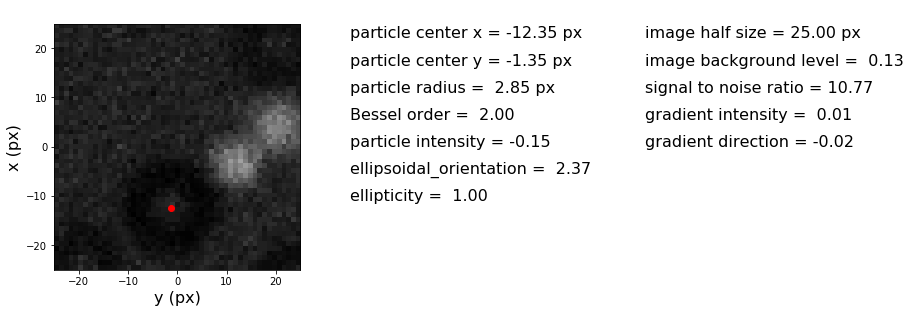

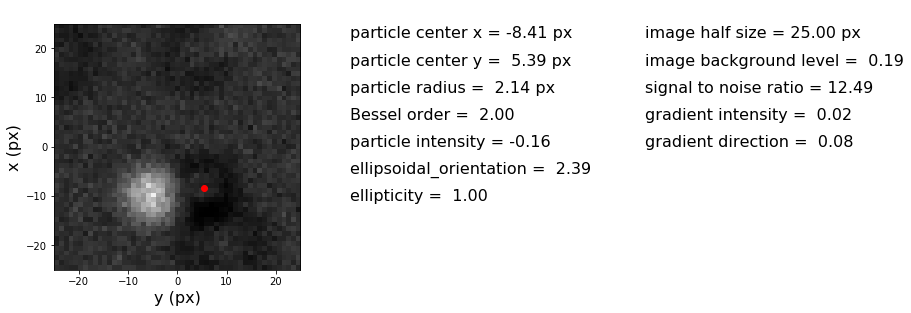

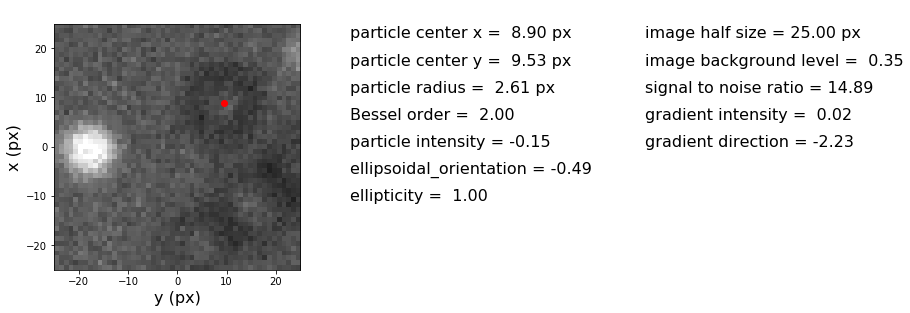

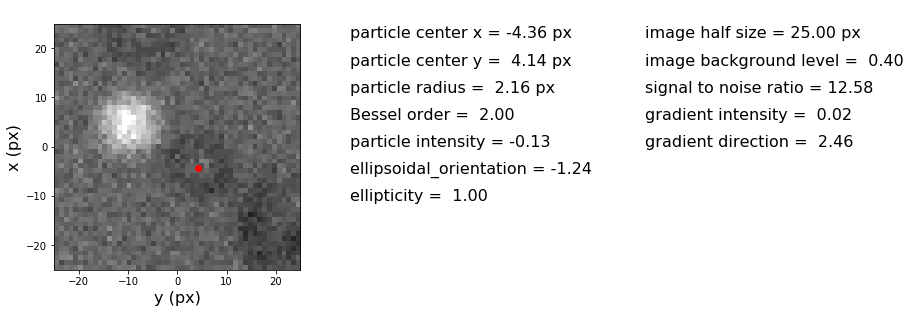

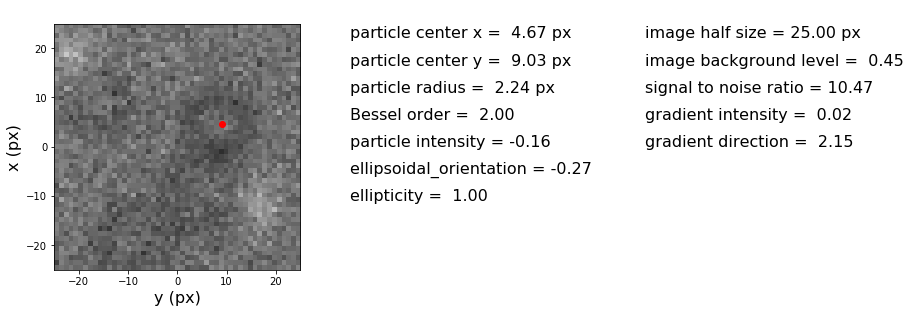

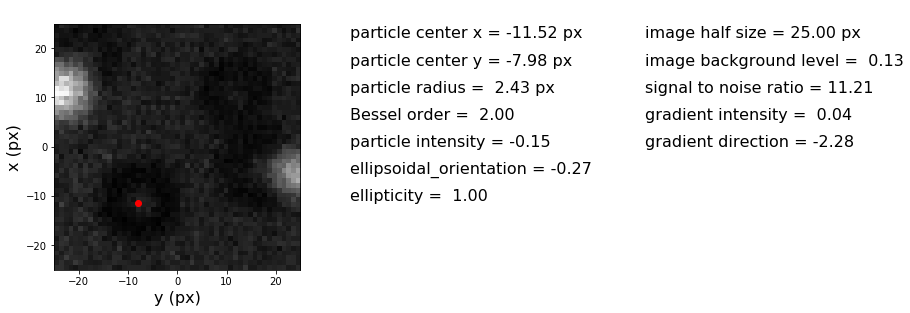

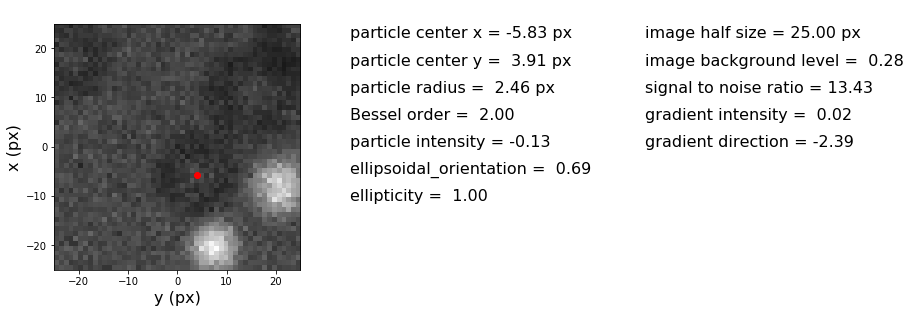

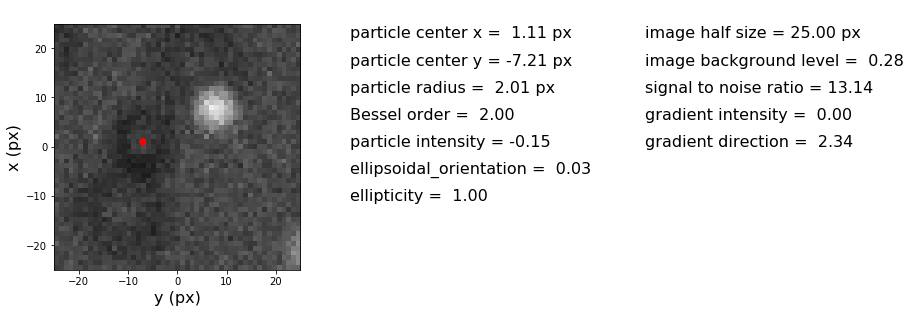

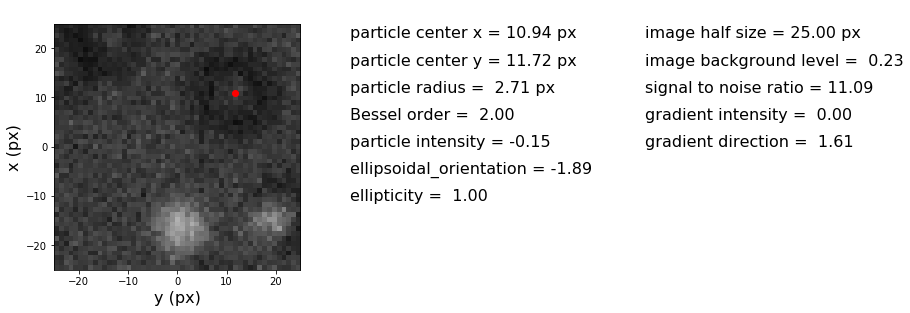

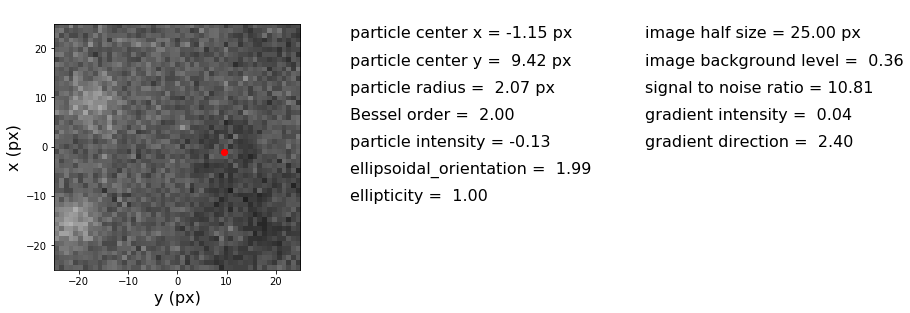

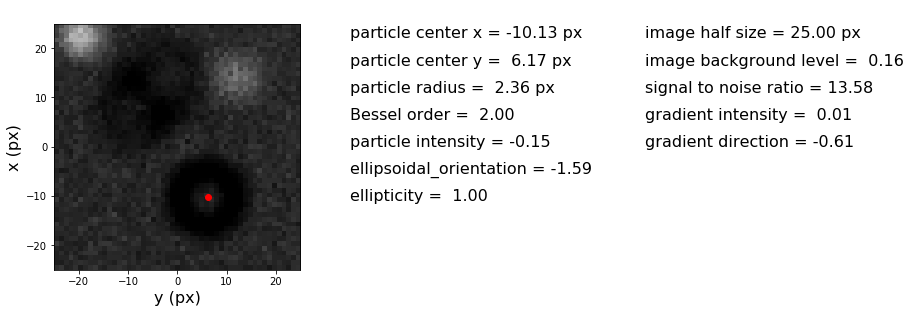

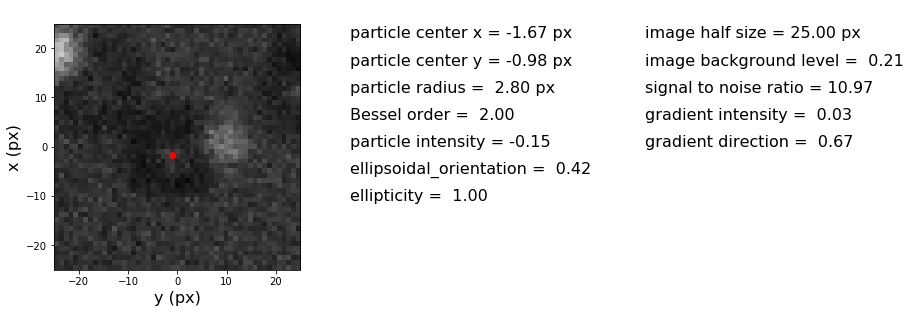

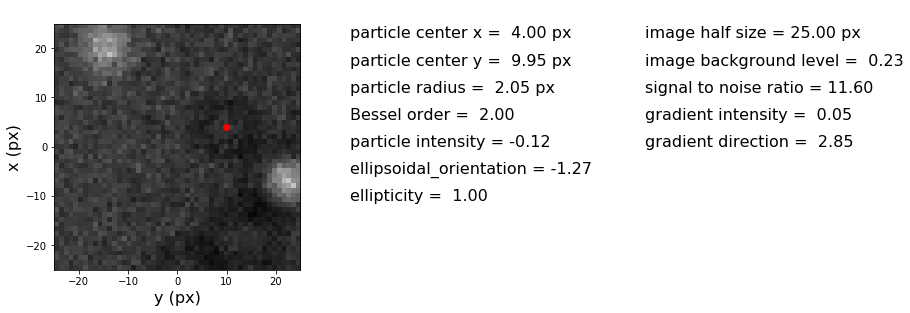

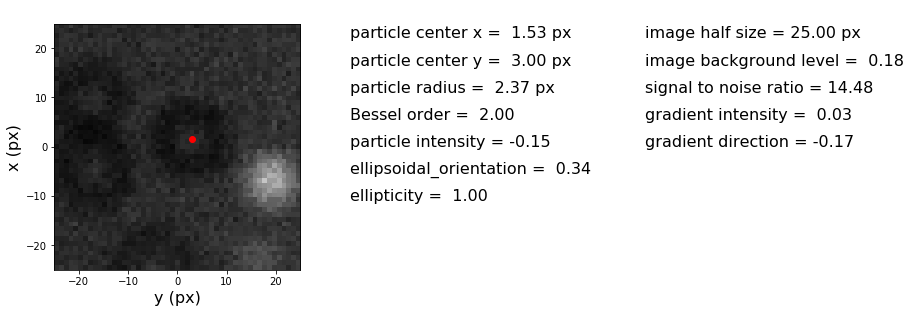

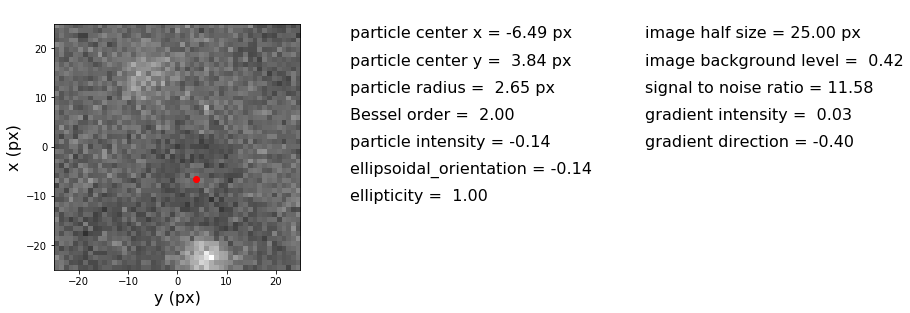

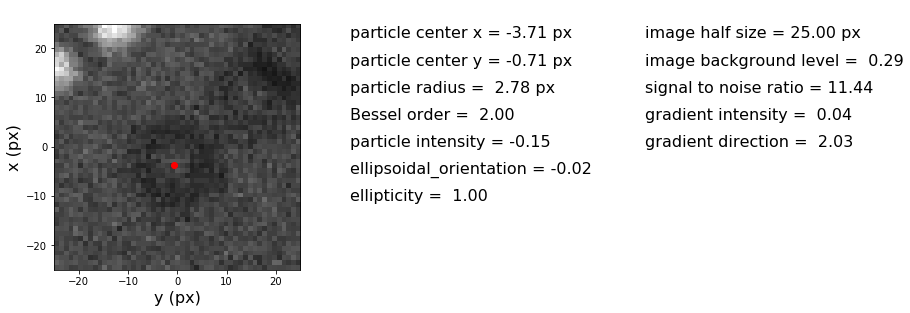

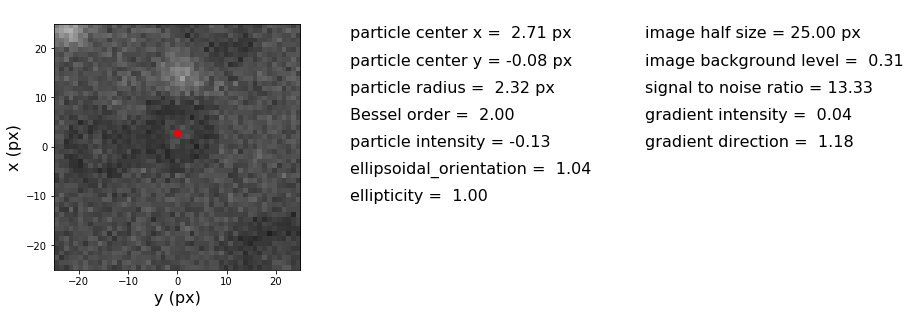

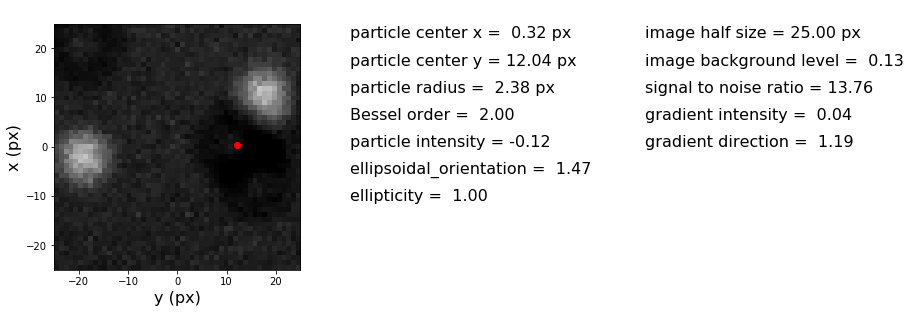

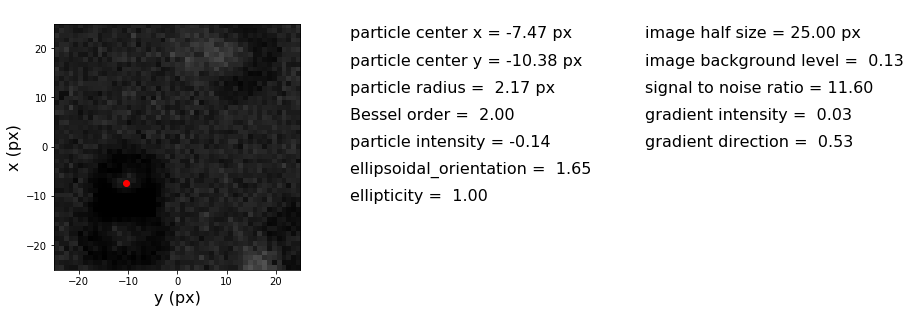

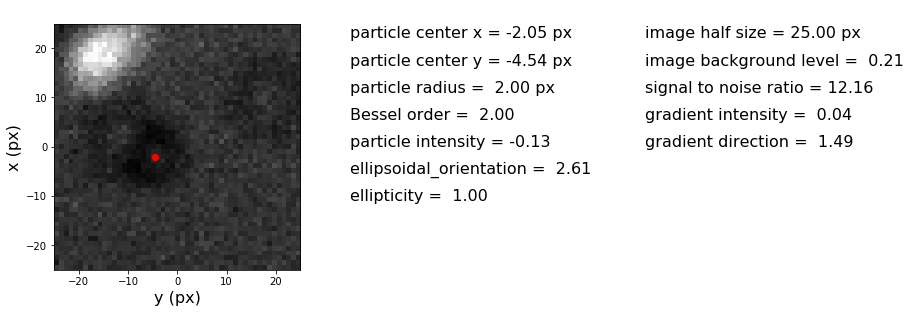

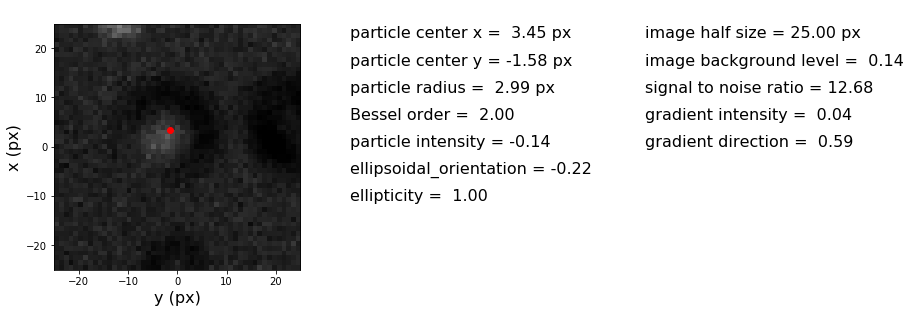

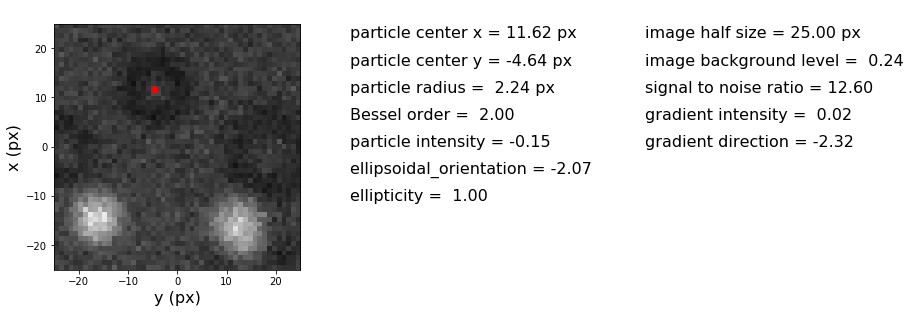

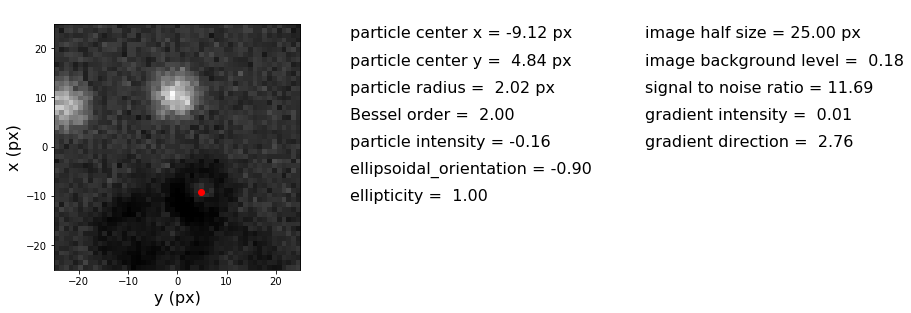

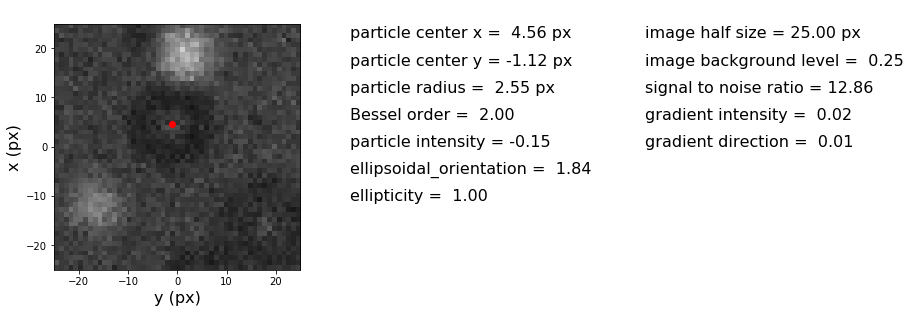

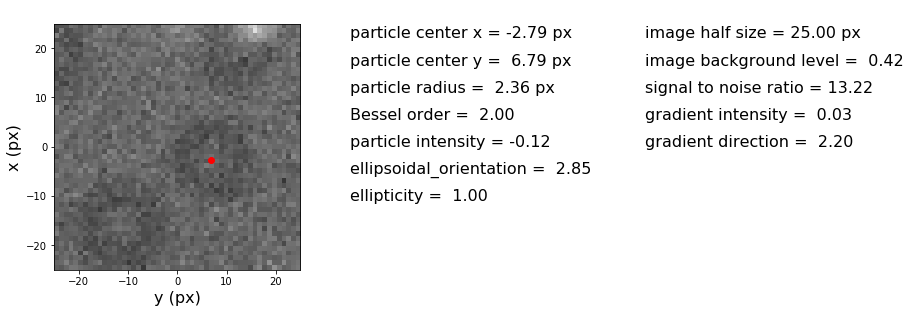

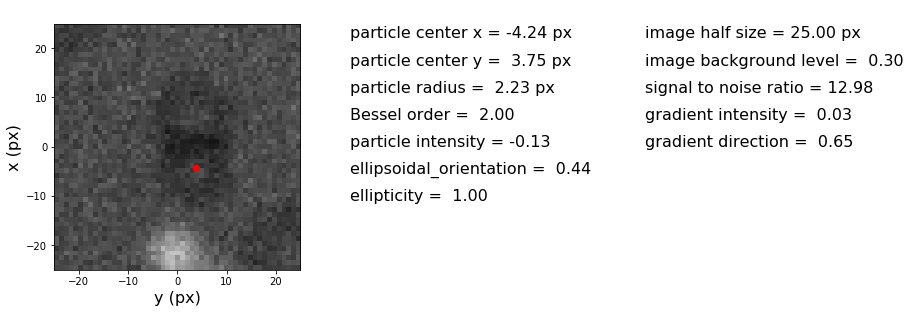

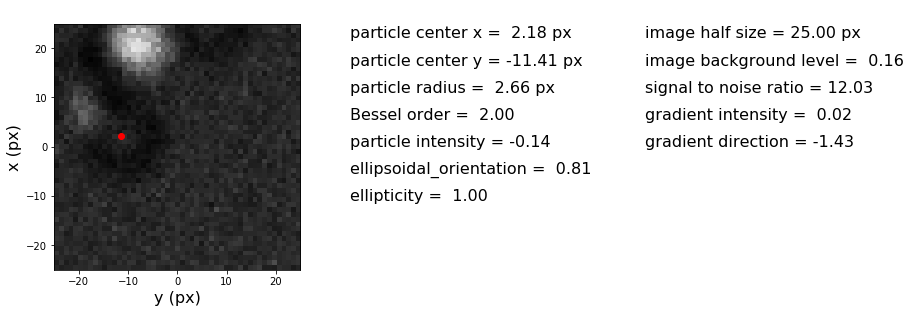

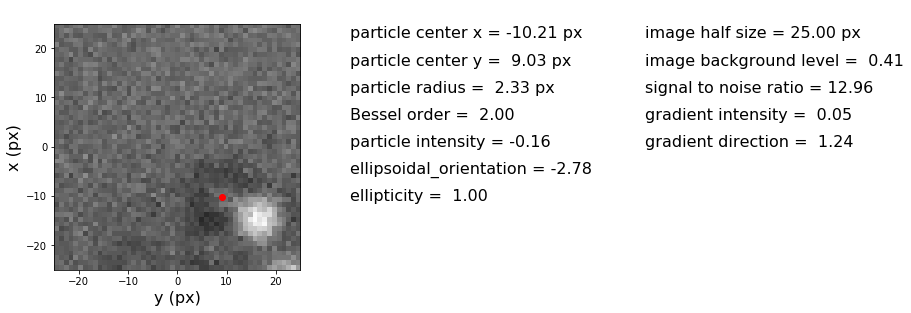

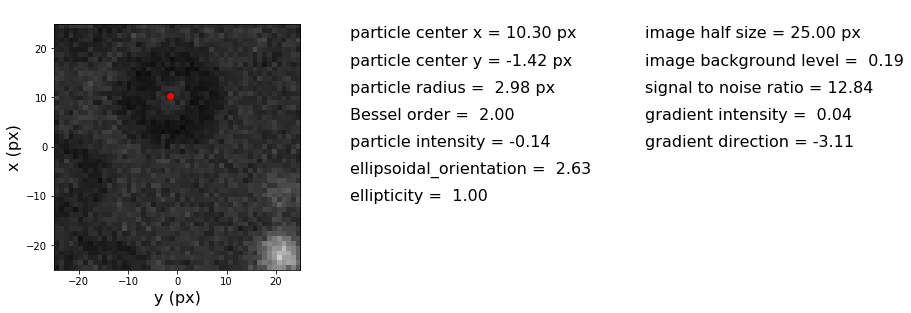

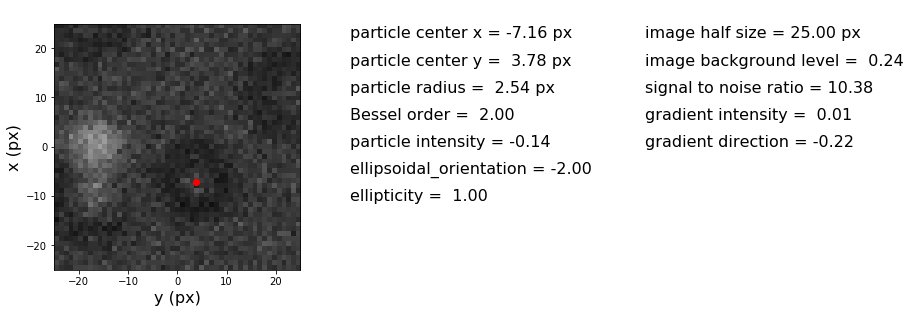

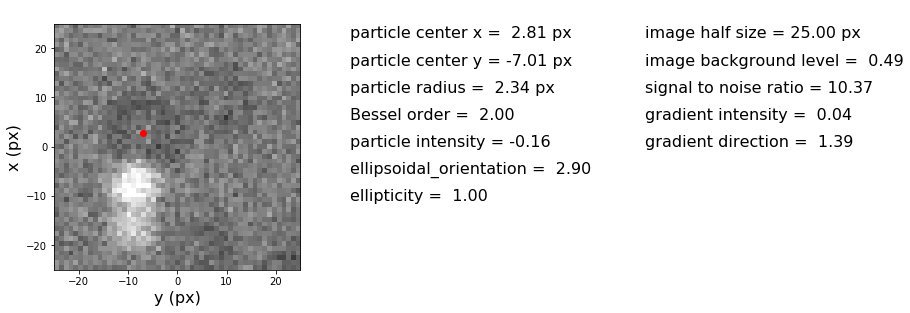

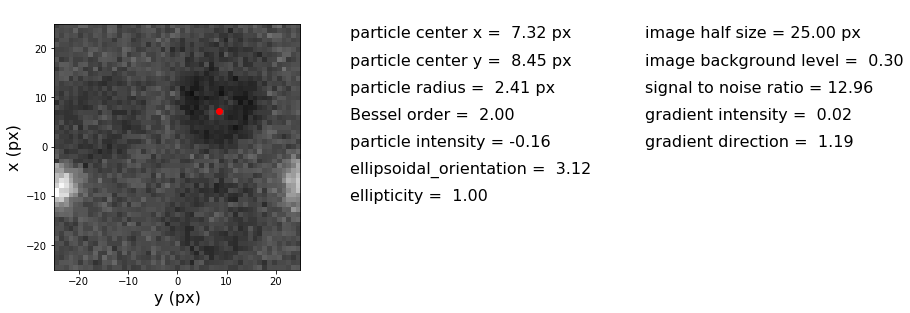

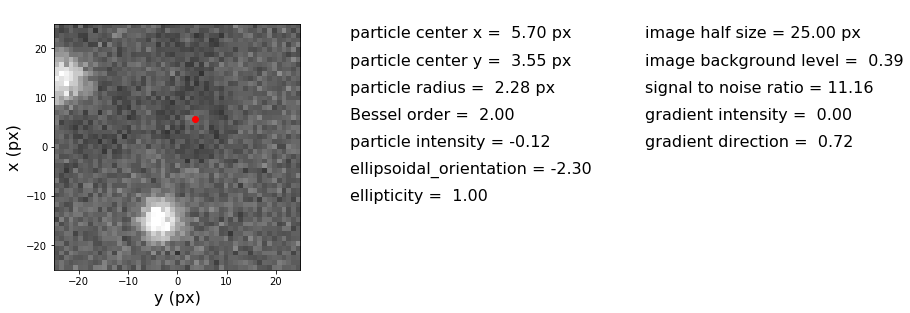

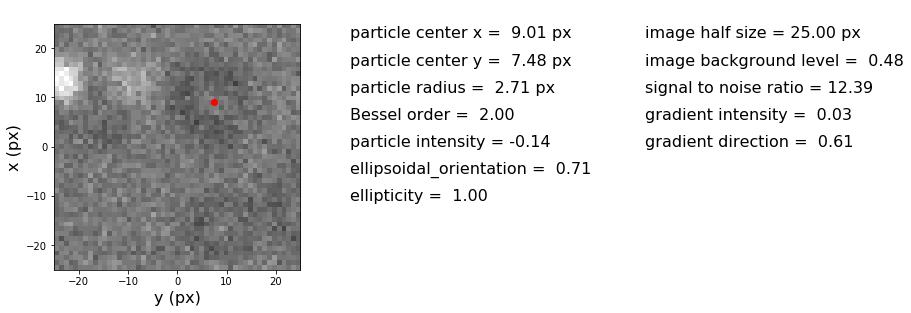

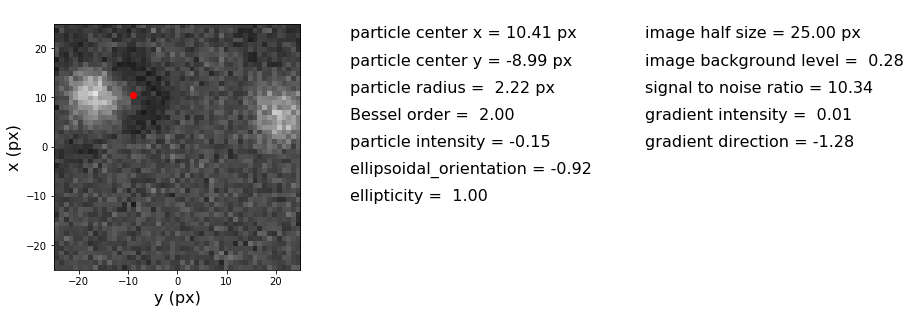

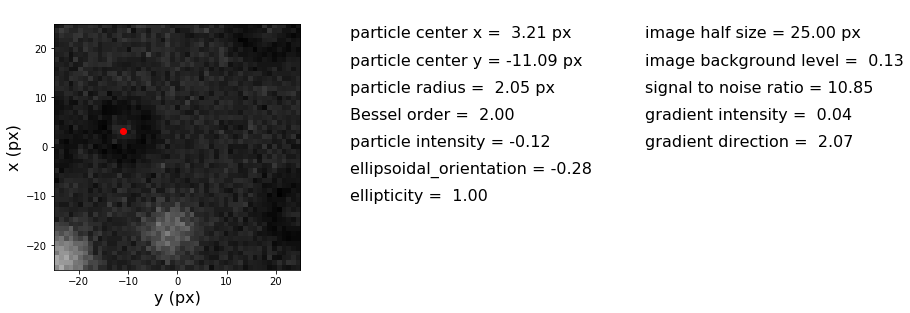

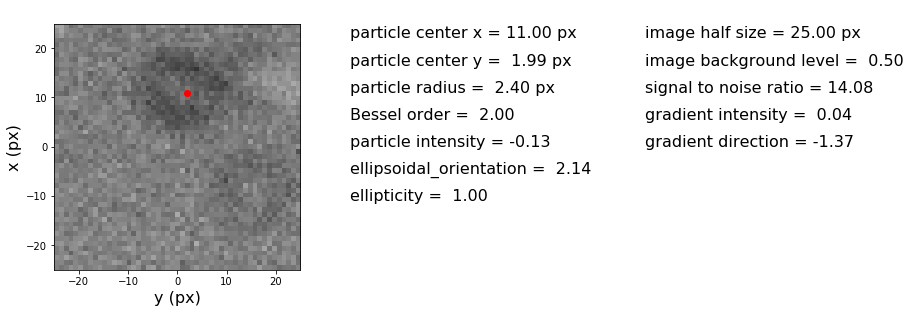

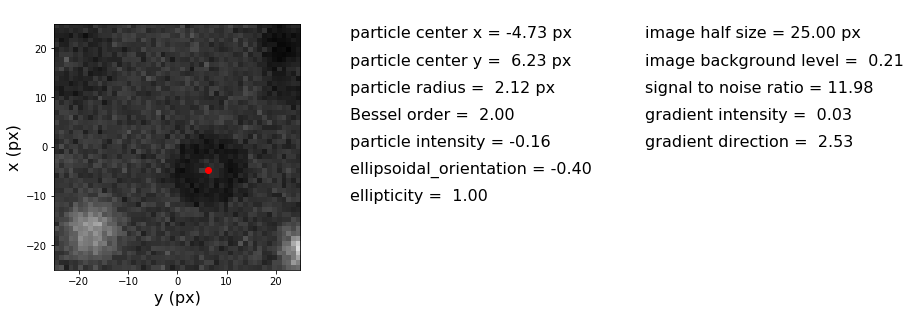

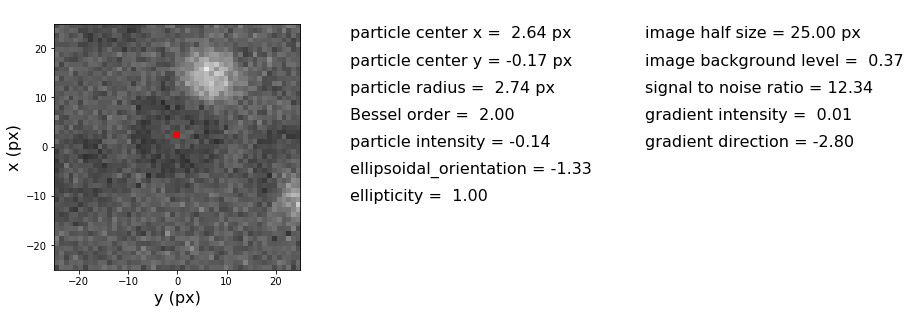

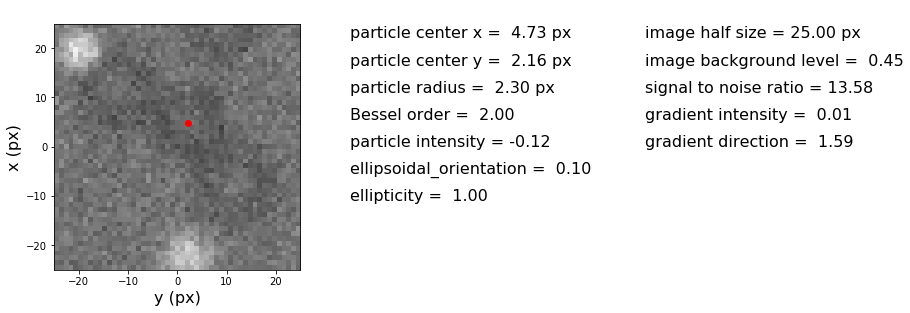

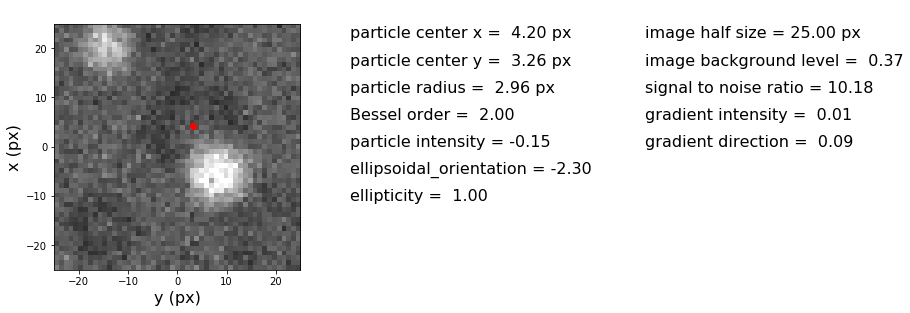

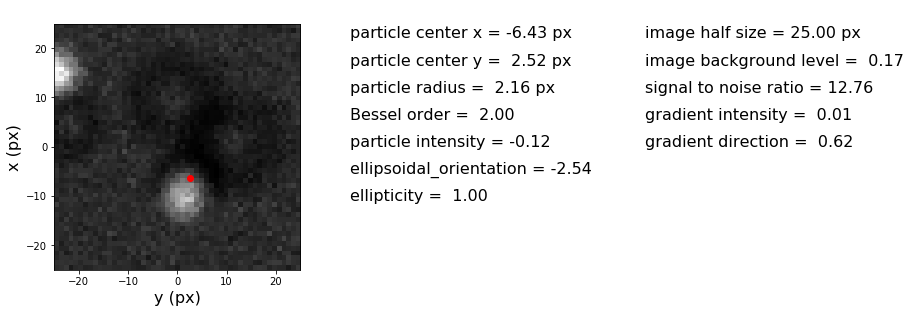

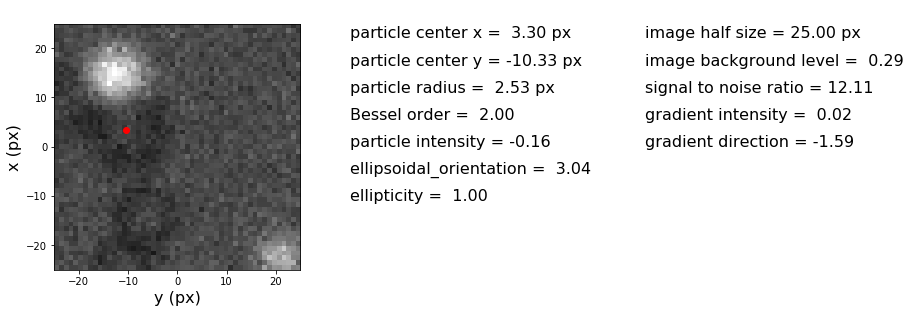

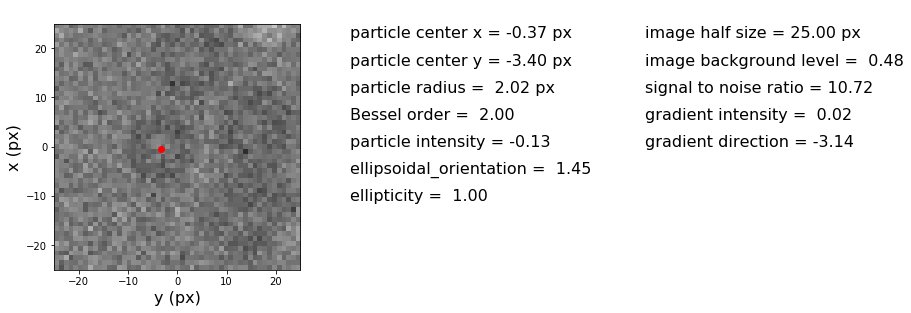

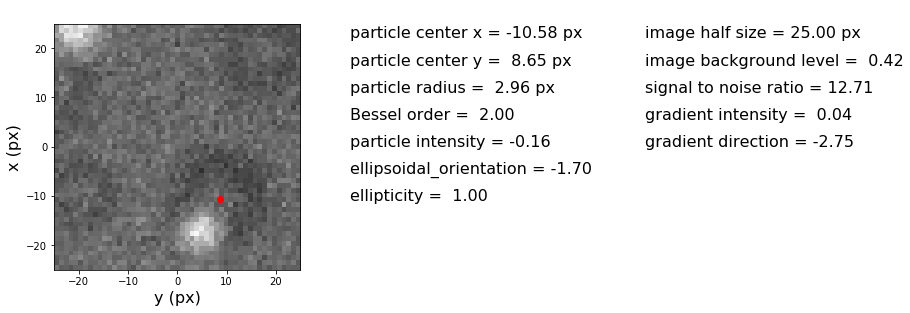

In [3]:
### Define image properties
%matplotlib inline
from numpy.random import randint, uniform, normal, choice
from math import pi

particle_number = 6
first_particle_range = 12.5
other_particle_range = 27.5 
particle_distance = 50 

def get_image_parameters_optimized():
    (particles_center_x, particles_center_y)=deeptrack.particle_positions(particle_number, first_particle_range, other_particle_range, particle_distance)
    image_parameters = {}
    image_parameters['Particle Center X List'] = particles_center_x
    image_parameters['Particle Center Y List'] = particles_center_y
    image_parameters['Particle Radius List'] = uniform(2, 3, len(particles_center_x))
    image_parameters['Particle Bessel Orders List'] = [[2, ], [1, ], [2, ], [2, ], [1, ], [2, ]]
    image_parameters['Particle Intensities List'] = [[-uniform(0.12, 0.16, 1), ], [uniform(0.1, 0.8, 1), ], [-uniform(0.1, 0.12, 1), ], [-uniform(0.1, 0.12, 1), ], [uniform(0.1, 0.8, 1), ], [-uniform(0.1, 0.12, 1), ]]
    image_parameters['Image Half-Size'] = 25
    image_parameters['Image Background Level'] = uniform(.1, .5)
    image_parameters['Signal to Noise Ratio'] = uniform(10, 15)
    image_parameters['Gradient Intensity'] = uniform(0, 0.05)
    image_parameters['Gradient Direction'] = uniform(-pi, pi)
    image_parameters['Ellipsoid Orientation'] = uniform(-pi, pi, particle_number)
    image_parameters['Ellipticity'] = 1
    
    return image_parameters

image_parameters_function = lambda : get_image_parameters_optimized()

### Define image generator
image_generator = lambda : deeptrack.get_image_generator(image_parameters_function)

### Show some examples of generated images
number_of_images_to_show = 100

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_images_to_show:
        break
    
    deeptrack.plot_sample_image(image, image_parameters)


## 4. USE A PRETRAINED DEEP LEARNING NETWORK

The pretraiend network saved in the file "DeepTrack - Example 4 - Pretrained network.h5" is loaded and its performance on selected video is tested.

Video file: DeepTrack - Example 4 - Brownian particles + bacteria.mp4

Note that the file "DeepTrack - Example 4 - Pretrained network.h5" and the video file must be in the same folder as this notebook.

Comments:
1. <strong>number_frames_to_be_tracked</strong> can be changed to track different number of frames. If number_frames is equal to 0 then the whole video is tracked.
2. <strong>box_half_size</strong> is half the size of the box to be scanned over the frames. The resulting sample should be comparable to the training image.
3. <strong>box_scanning_step</strong> is the step that is used to scan the box over the frame. It can be increased for higher accuracy or decreased for lower computational time.

In [4]:
### Define the video file to be tracked
video_file_name = 'DeepTrack - Example 4 - Brownian particles + bacteria.mp4'

### Define the number of frames to be tracked
number_frames_to_be_tracked = 2

### Define the size of the box to be scanned over the frames
box_half_size = 25 

### Define the scanning step over the frame
box_scanning_step = 5 

### Preprocess the images
frame_normalize = 0
frame_enhance = 1

### Load the pretrained network
saved_network_file_name = 'DeepTrack - Example 4 - Pretrained network.h5'
network = deeptrack.load(saved_network_file_name)

### Track the video
(frames, predicted_positions_wrt_frame, predicted_positions_wrt_box, boxes_all) = deeptrack.track_video(
    video_file_name, 
    network, 
    number_frames_to_be_tracked, 
    box_half_size, 
    box_scanning_step,
    frame_normalize,
    frame_enhance)

Using TensorFlow backend.


## 5. SHOW EXAMPLES OF TRACKED SCANNING BOXES

The tracked scanning boxes are plotted over a range of frames, rows and columns.

Comments:
1. <strong>frame_to_be_shown</strong> can be changed to view different frames.
2. <strong>rows_to_be_shown</strong> can be changed to view different rows of each of the frames.
3. <strong>columns_to_be_shown</strong> can be changed to view different columns of each of the frames.
4. The <font color=blue><strong>blue<strong></font> symbol is the deep learning network prediction for the position (x, y).


frame 0
row 10
column 5
particle center x = 25.24 px
particle center y = 22.83 px
particle radius = 14.37 px


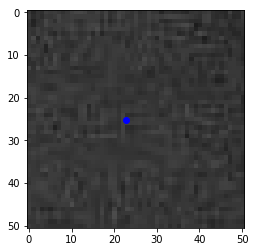

frame 0
row 10
column 6
particle center x = 25.26 px
particle center y = 22.71 px
particle radius = 14.38 px


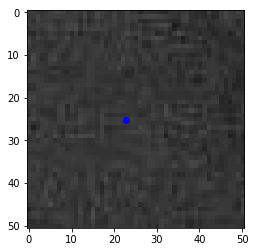

frame 0
row 10
column 7
particle center x = 27.34 px
particle center y = 24.45 px
particle radius = 15.01 px


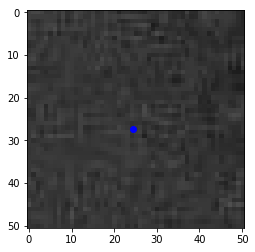

frame 0
row 10
column 8
particle center x = 26.11 px
particle center y = 25.27 px
particle radius = 14.85 px


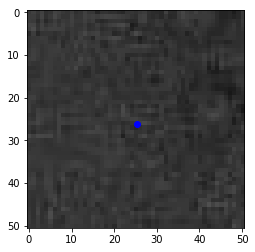

frame 0
row 10
column 9
particle center x = 25.09 px
particle center y = 34.64 px
particle radius = 13.10 px


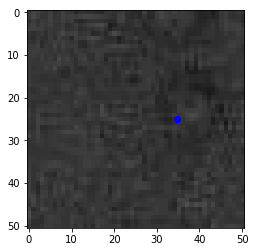

frame 0
row 10
column 10
particle center x = 22.08 px
particle center y = 34.74 px
particle radius = 10.07 px


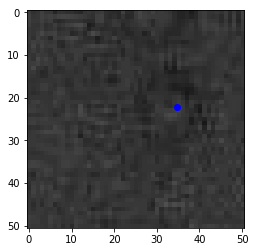

frame 0
row 10
column 11
particle center x = 22.99 px
particle center y = 29.53 px
particle radius =  5.44 px


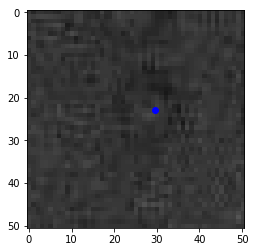

frame 0
row 10
column 12
particle center x = 22.64 px
particle center y = 22.66 px
particle radius =  3.56 px


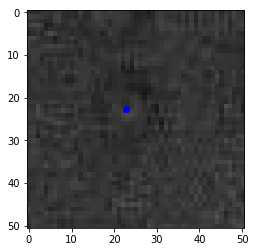

frame 0
row 10
column 13
particle center x = 23.26 px
particle center y = 18.29 px
particle radius =  7.21 px


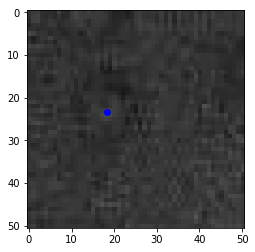

frame 0
row 10
column 14
particle center x = 22.70 px
particle center y = 14.52 px
particle radius = 11.52 px


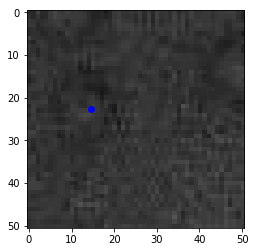

frame 0
row 10
column 15
particle center x = 27.59 px
particle center y = 18.44 px
particle radius = 13.54 px


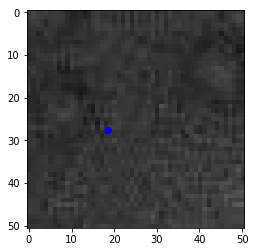

frame 0
row 10
column 16
particle center x = 21.99 px
particle center y = 29.31 px
particle radius = 14.59 px


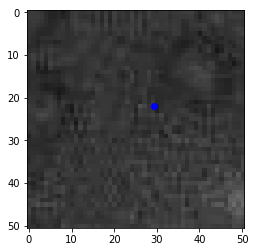

frame 0
row 10
column 17
particle center x = 14.97 px
particle center y = 33.49 px
particle radius = 14.86 px


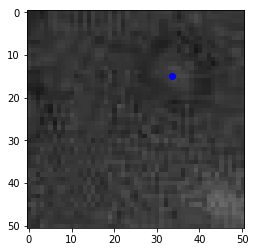

frame 0
row 10
column 18
particle center x = 14.20 px
particle center y = 30.36 px
particle radius = 12.65 px


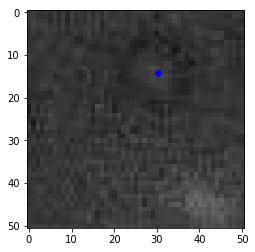

frame 0
row 10
column 19
particle center x = 14.29 px
particle center y = 25.69 px
particle radius = 11.32 px


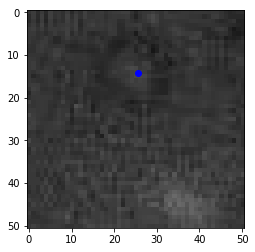

frame 0
row 11
column 5
particle center x = 25.81 px
particle center y = 22.86 px
particle radius = 14.58 px


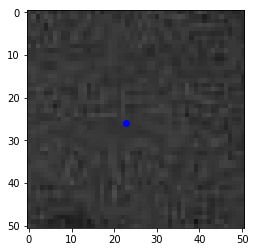

frame 0
row 11
column 6
particle center x = 26.02 px
particle center y = 23.11 px
particle radius = 14.62 px


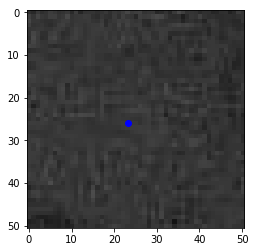

frame 0
row 11
column 7
particle center x = 27.36 px
particle center y = 23.99 px
particle radius = 15.03 px


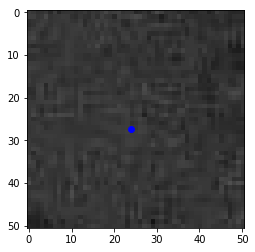

frame 0
row 11
column 8
particle center x = 28.75 px
particle center y = 24.71 px
particle radius = 14.83 px


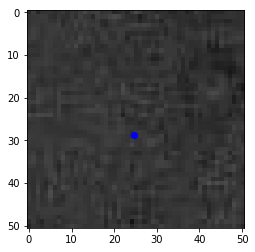

frame 0
row 11
column 9
particle center x = 25.87 px
particle center y = 32.48 px
particle radius = 14.30 px


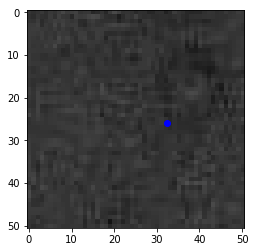

frame 0
row 11
column 10
particle center x = 18.25 px
particle center y = 33.85 px
particle radius = 12.25 px


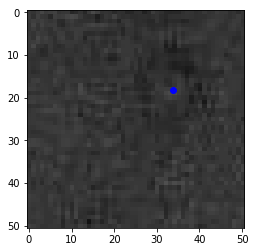

frame 0
row 11
column 11
particle center x = 17.30 px
particle center y = 29.18 px
particle radius =  8.63 px


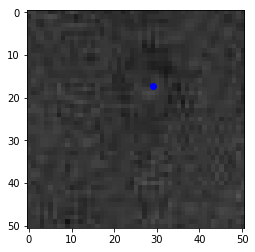

frame 0
row 11
column 12
particle center x = 17.09 px
particle center y = 22.20 px
particle radius =  8.34 px


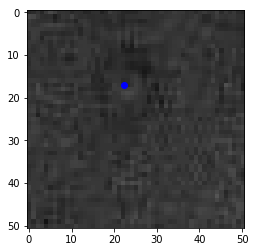

frame 0
row 11
column 13
particle center x = 16.91 px
particle center y = 18.19 px
particle radius = 10.82 px


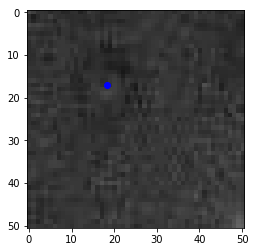

frame 0
row 11
column 14
particle center x = 17.13 px
particle center y = 14.48 px
particle radius = 13.92 px


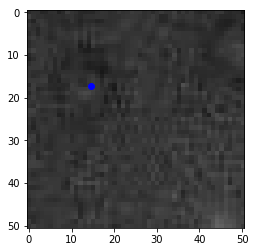

frame 0
row 11
column 15
particle center x = 24.37 px
particle center y = 20.68 px
particle radius = 14.09 px


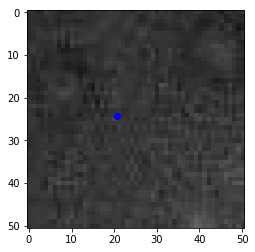

frame 0
row 11
column 16
particle center x = 24.12 px
particle center y = 23.15 px
particle radius = 14.60 px


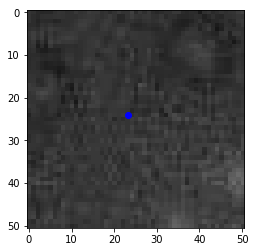

frame 0
row 11
column 17
particle center x = 23.49 px
particle center y = 23.78 px
particle radius = 15.22 px


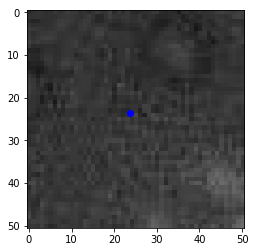

frame 0
row 11
column 18
particle center x = 23.93 px
particle center y = 26.93 px
particle radius = 13.79 px


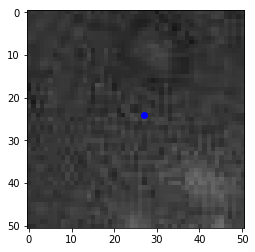

frame 0
row 11
column 19
particle center x = 25.17 px
particle center y = 31.26 px
particle radius = 13.19 px


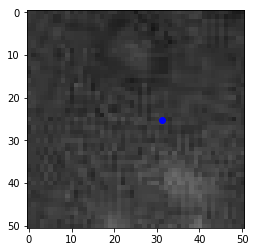

frame 0
row 12
column 5
particle center x = 27.73 px
particle center y = 22.83 px
particle radius = 14.96 px


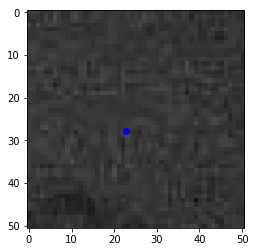

frame 0
row 12
column 6
particle center x = 27.96 px
particle center y = 23.23 px
particle radius = 14.78 px


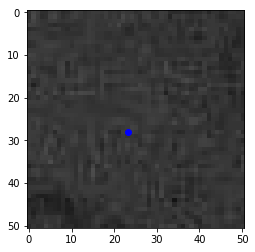

frame 0
row 12
column 7
particle center x = 26.80 px
particle center y = 23.84 px
particle radius = 14.91 px


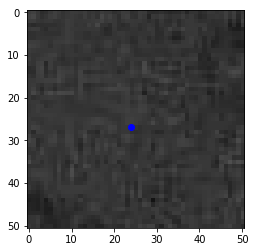

frame 0
row 12
column 8
particle center x = 26.57 px
particle center y = 24.06 px
particle radius = 14.72 px


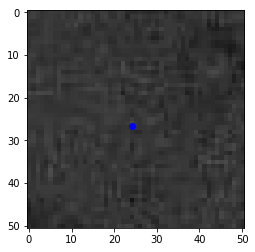

frame 0
row 12
column 9
particle center x = 25.87 px
particle center y = 26.83 px
particle radius = 14.92 px


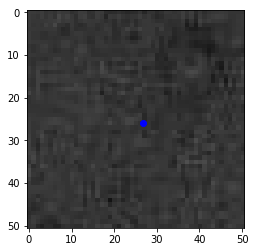

frame 0
row 12
column 10
particle center x = 18.93 px
particle center y = 30.82 px
particle radius = 14.13 px


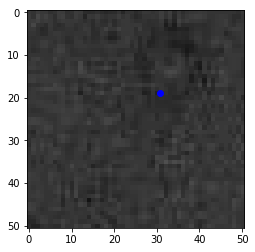

frame 0
row 12
column 11
particle center x = 14.64 px
particle center y = 26.96 px
particle radius = 12.26 px


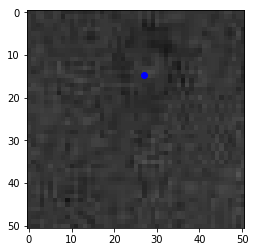

frame 0
row 12
column 12
particle center x = 14.19 px
particle center y = 24.23 px
particle radius = 12.30 px


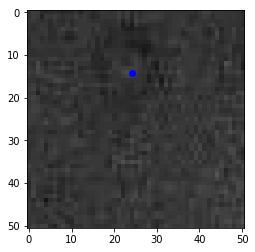

frame 0
row 12
column 13
particle center x = 14.50 px
particle center y = 19.06 px
particle radius = 13.41 px


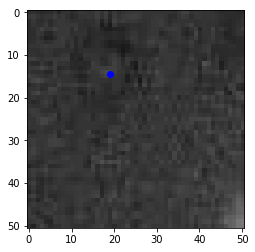

frame 0
row 12
column 14
particle center x = 16.89 px
particle center y = 16.39 px
particle radius = 14.08 px


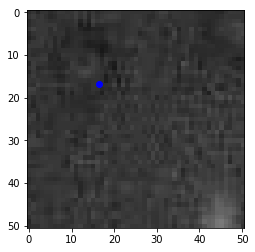

frame 0
row 12
column 15
particle center x = 24.85 px
particle center y = 22.02 px
particle radius = 14.46 px


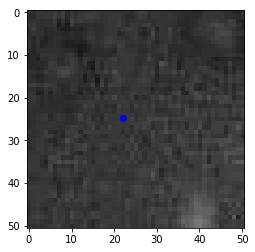

frame 0
row 12
column 16
particle center x = 26.42 px
particle center y = 21.52 px
particle radius = 14.32 px


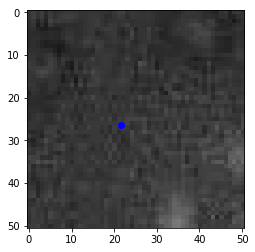

frame 0
row 12
column 17
particle center x = 26.40 px
particle center y = 21.72 px
particle radius = 14.81 px


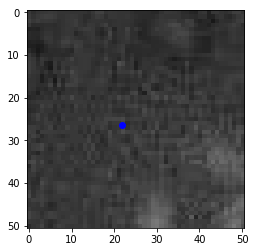

frame 0
row 12
column 18
particle center x = 28.51 px
particle center y = 24.99 px
particle radius = 14.46 px


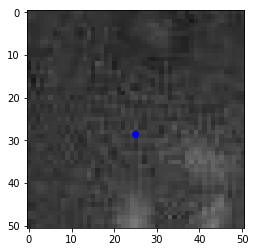

frame 0
row 12
column 19
particle center x = 24.87 px
particle center y = 28.81 px
particle radius = 14.09 px


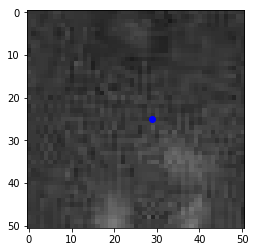

frame 0
row 13
column 5
particle center x = 26.06 px
particle center y = 22.31 px
particle radius = 14.93 px


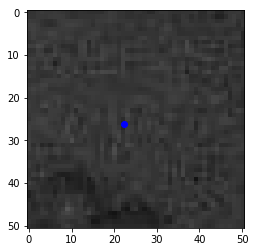

frame 0
row 13
column 6
particle center x = 27.11 px
particle center y = 24.37 px
particle radius = 15.14 px


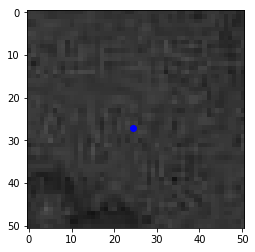

frame 0
row 13
column 7
particle center x = 27.33 px
particle center y = 25.41 px
particle radius = 15.25 px


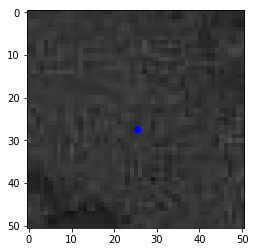

frame 0
row 13
column 8
particle center x = 26.92 px
particle center y = 23.75 px
particle radius = 14.82 px


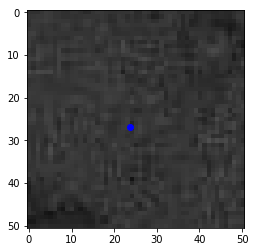

frame 0
row 13
column 9
particle center x = 27.16 px
particle center y = 24.47 px
particle radius = 14.61 px


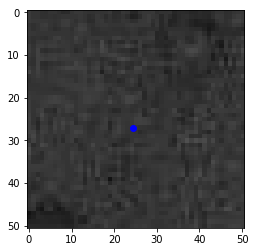

frame 0
row 13
column 10
particle center x = 28.12 px
particle center y = 24.59 px
particle radius = 14.09 px


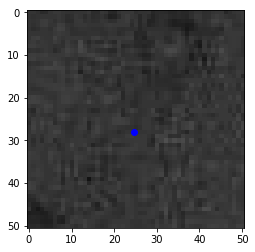

frame 0
row 13
column 11
particle center x = 26.42 px
particle center y = 23.83 px
particle radius = 13.63 px


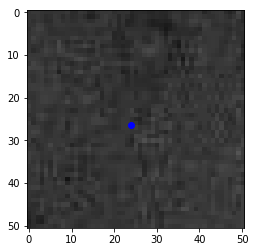

frame 0
row 13
column 12
particle center x = 25.52 px
particle center y = 22.17 px
particle radius = 13.54 px


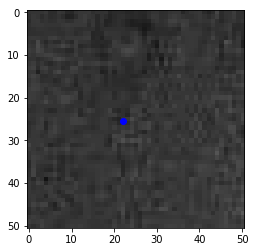

frame 0
row 13
column 13
particle center x = 26.10 px
particle center y = 21.15 px
particle radius = 13.93 px


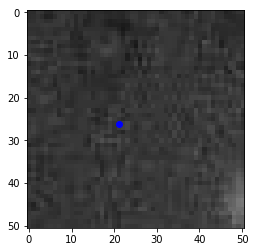

frame 0
row 13
column 14
particle center x = 26.36 px
particle center y = 20.84 px
particle radius = 14.30 px


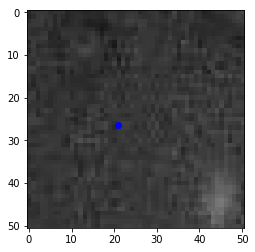

frame 0
row 13
column 15
particle center x = 27.11 px
particle center y = 22.33 px
particle radius = 14.43 px


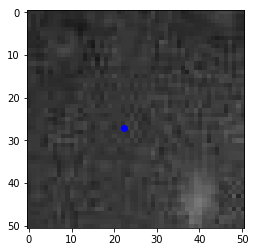

frame 0
row 13
column 16
particle center x = 27.36 px
particle center y = 21.92 px
particle radius = 14.88 px


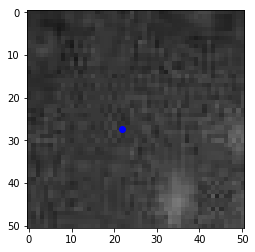

frame 0
row 13
column 17
particle center x = 29.19 px
particle center y = 21.86 px
particle radius = 15.27 px


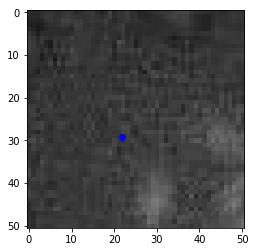

frame 0
row 13
column 18
particle center x = 29.42 px
particle center y = 24.88 px
particle radius = 15.11 px


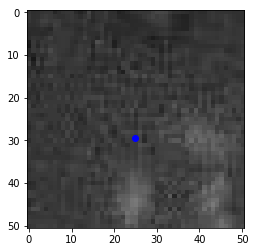

frame 0
row 13
column 19
particle center x = 29.08 px
particle center y = 25.19 px
particle radius = 14.74 px


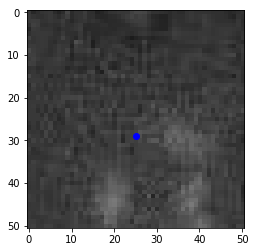

frame 0
row 14
column 5
particle center x = 29.94 px
particle center y = 20.37 px
particle radius = 15.54 px


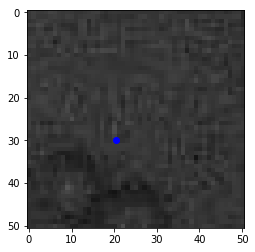

frame 0
row 14
column 6
particle center x = 26.76 px
particle center y = 23.35 px
particle radius = 15.58 px


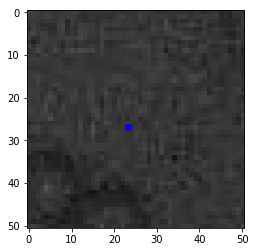

frame 0
row 14
column 7
particle center x = 27.65 px
particle center y = 26.38 px
particle radius = 15.82 px


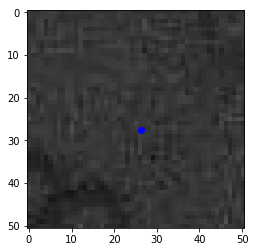

frame 0
row 14
column 8
particle center x = 28.11 px
particle center y = 25.64 px
particle radius = 15.43 px


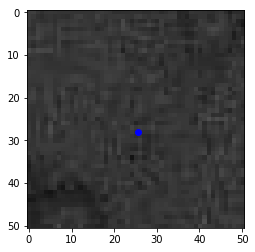

frame 0
row 14
column 9
particle center x = 28.22 px
particle center y = 23.66 px
particle radius = 14.76 px


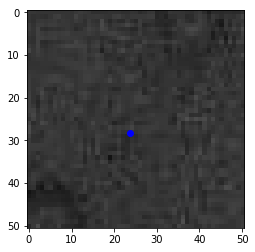

frame 0
row 14
column 10
particle center x = 26.50 px
particle center y = 22.71 px
particle radius = 14.24 px


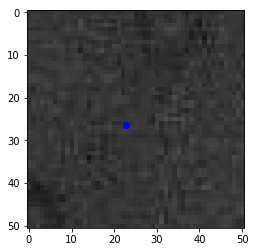

frame 0
row 14
column 11
particle center x = 25.20 px
particle center y = 20.90 px
particle radius = 13.92 px


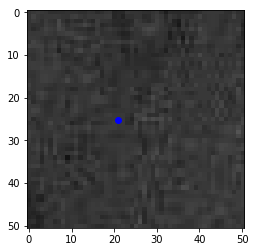

frame 0
row 14
column 12
particle center x = 24.47 px
particle center y = 21.53 px
particle radius = 14.21 px


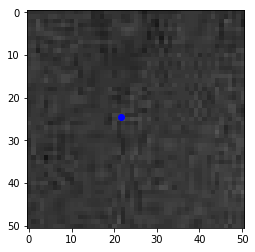

frame 0
row 14
column 13
particle center x = 27.34 px
particle center y = 22.77 px
particle radius = 14.61 px


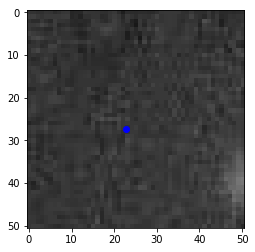

frame 0
row 14
column 14
particle center x = 27.80 px
particle center y = 23.01 px
particle radius = 14.52 px


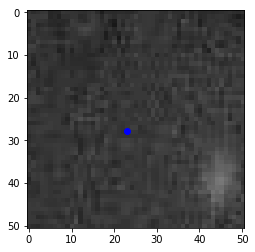

frame 0
row 14
column 15
particle center x = 27.96 px
particle center y = 22.05 px
particle radius = 14.33 px


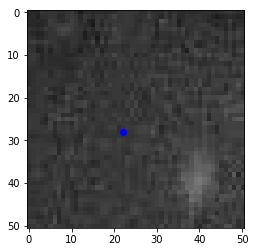

frame 0
row 14
column 16
particle center x = 27.98 px
particle center y = 22.36 px
particle radius = 15.03 px


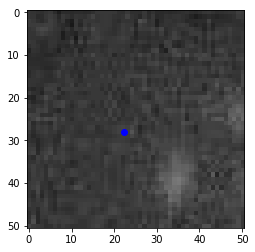

frame 0
row 14
column 17
particle center x = 29.61 px
particle center y = 23.57 px
particle radius = 14.96 px


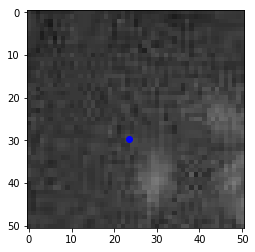

frame 0
row 14
column 18
particle center x = 31.63 px
particle center y = 27.80 px
particle radius = 14.76 px


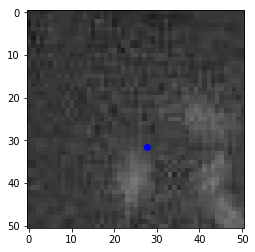

frame 0
row 14
column 19
particle center x = 34.30 px
particle center y = 29.53 px
particle radius = 14.36 px


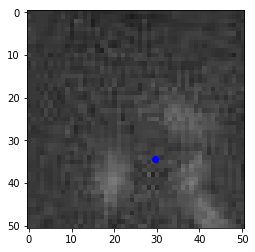

In [5]:
### Define frames, rows and columns of the samples to be shown
frames_to_be_shown = range(1)
rows_to_be_shown = range(10,15)
columns_to_be_shown = range(5,20)

### Show boxes
deeptrack.plot_tracked_scanning_boxes(
    frames_to_be_shown, 
    rows_to_be_shown, 
    columns_to_be_shown, 
    boxes_all, 
    predicted_positions_wrt_box)

## 6. SHOW EXAMPLES OF TRACKED FRAMES

The tracked frames are shown.

Comments:
1. <strong>particle_radial_distance_threshold</strong> can be changed to choose which prediction points (<font color=blue><strong>blue<strong></font> dots) are to be used to calculate the centroid positions (<font color='#e6661a'><strong>orange<strong></font> circles). We used 3.75 pixels. 
2. <strong>particle_maximum_interdistance</strong> can be changed to choose what predicted points (<font color=blue><strong>blue<strong></font> dots) belong to the same particle. We used 10 pixels. 


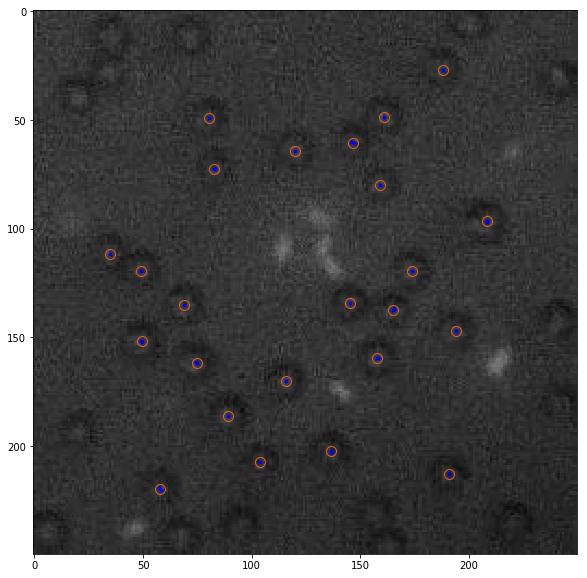

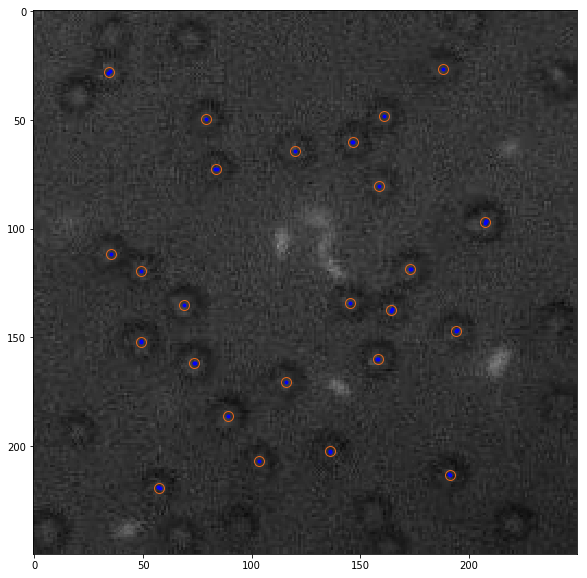

In [6]:
### Define minimum radial distance from the center of the scanning boxes
particle_radial_distance_threshold = 3.75

### Define the minumum distance between predicted scanning points for them belonging to the same particle
particle_maximum_interdistance = 10 

### Visualize tracked frames
deeptrack.show_tracked_frames(
    particle_radial_distance_threshold, 
    particle_maximum_interdistance, 
    min(number_frames_to_be_tracked, 10), 
    frames, 
    predicted_positions_wrt_frame)